HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HRData.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
pd.set_option('display.max_columns', None)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#We can a mix of rightly skewed data (Mean greater than median), left skewed (Median greater than mean) and presence of outliers (difference between the 75th percentile & max. 


Some Insights:

The minimum age = 18 and Max is 60
Average distance seems to 9 kilometer which can be one of the reasons for attrition (will look into it)
For Education, Here are the levels: 1: Less than a College Qual , 2: College, 3: Undergrad 4: 'Graduate', 5: 'Post Grad'
Majority of them seems to have college or undergrad qualification
For Envrionment Satisfaction: 1: 'Unsatisfactory' 2: 'Fair' 3: 'Good' 4: 'Exceptional'
Seems like the employee are somewhat happy with their working envrionment
Job Involvement:  1: Minimal 2: Regular 3: Motivated 4: 'Highly Motivated' (Average is Regular)
Relationship Satisfaction: 1: Low, 2- Average, 3: Good, 4: Very Good, 5: Exceptional (Average between Average & Good)
Work Life Balance is 1: 'Unsatisfactory' 2: 'Fair' 3: 'Good' 4: 'Exceptional' (its between Fair & Good)
Average performance rating seems to be good

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
#Here we can see that there are no null values

In [12]:
df.duplicated().sum()

0

In [13]:
#No duplicated values

In [14]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [15]:
#We can see that number of unique values in attrition is quite low which means that my target variable exhibits a classification problem rather than a regression problem

Personal Information
-Age
-Gender
-MaritalStatus
-Over 18

In [16]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [17]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [18]:
#Here we can see that there are more Male than females in this data set

In [19]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [20]:
#In this dataset, we have more married couples than Single & Divorced. However, after married couples we have more single people.

In [21]:
df['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

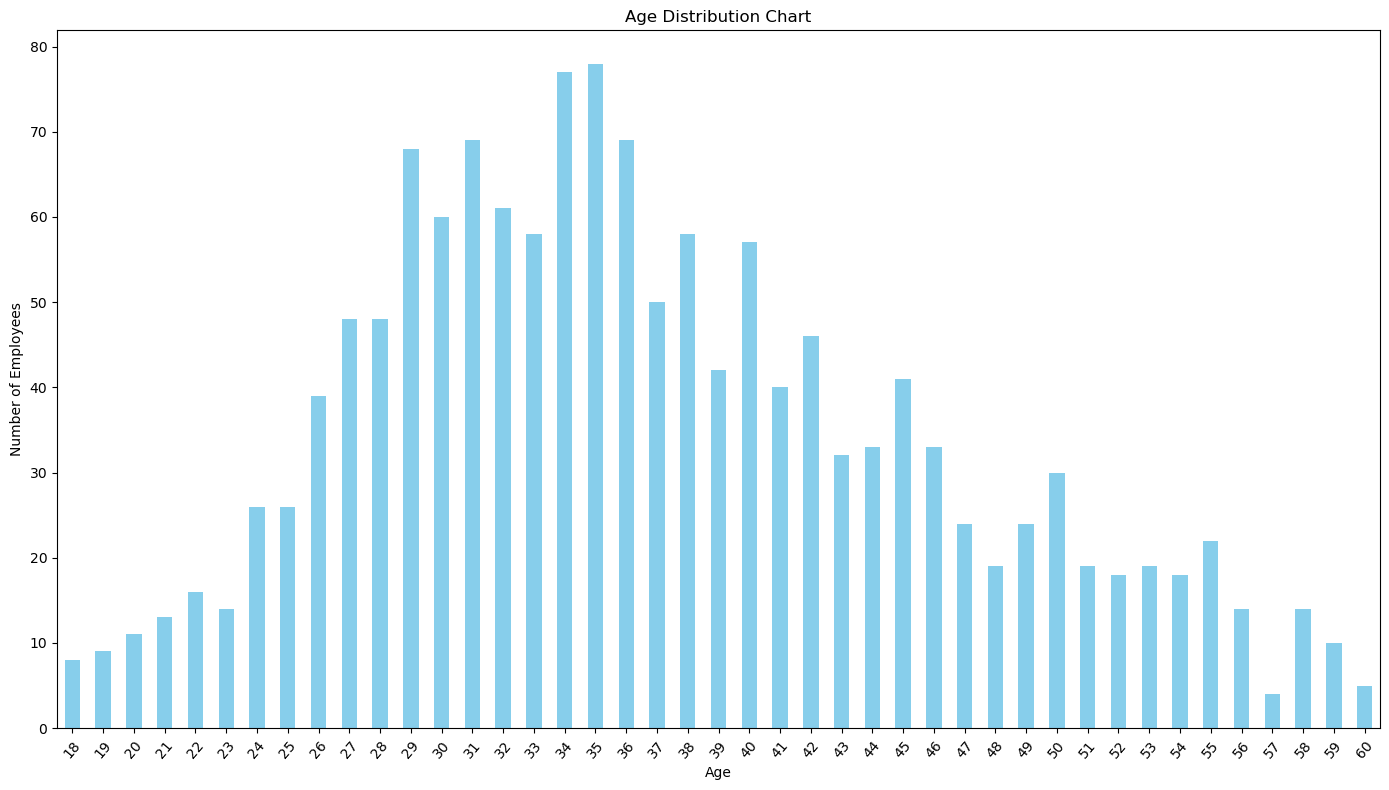

In [22]:
age_total = df['Age'].value_counts().sort_index(ascending=True)
plt.figure(figsize=(14, 8))
age_total.plot(kind='bar', color='skyblue')
plt.title('Age Distribution Chart')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.xticks(rotation=50) 
plt.tight_layout() 
plt.show()

In [23]:
#here we can see that there are more employees within the range of 29 to 36. 

In [24]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [25]:
#There are only 237 people who have left the job out of 1470 

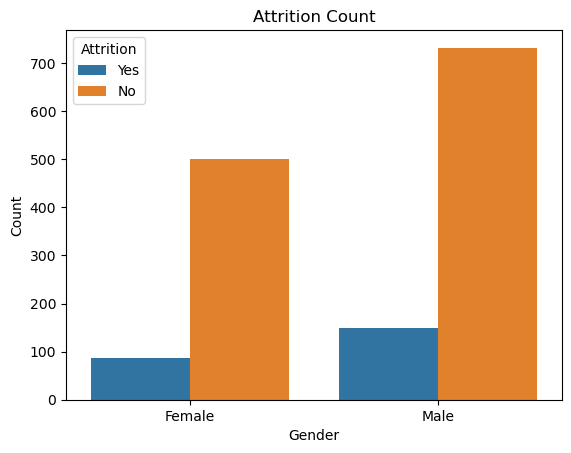

In [26]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition Count')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

In [27]:
#We can see that the attrition rate is quite higher for Male than Female

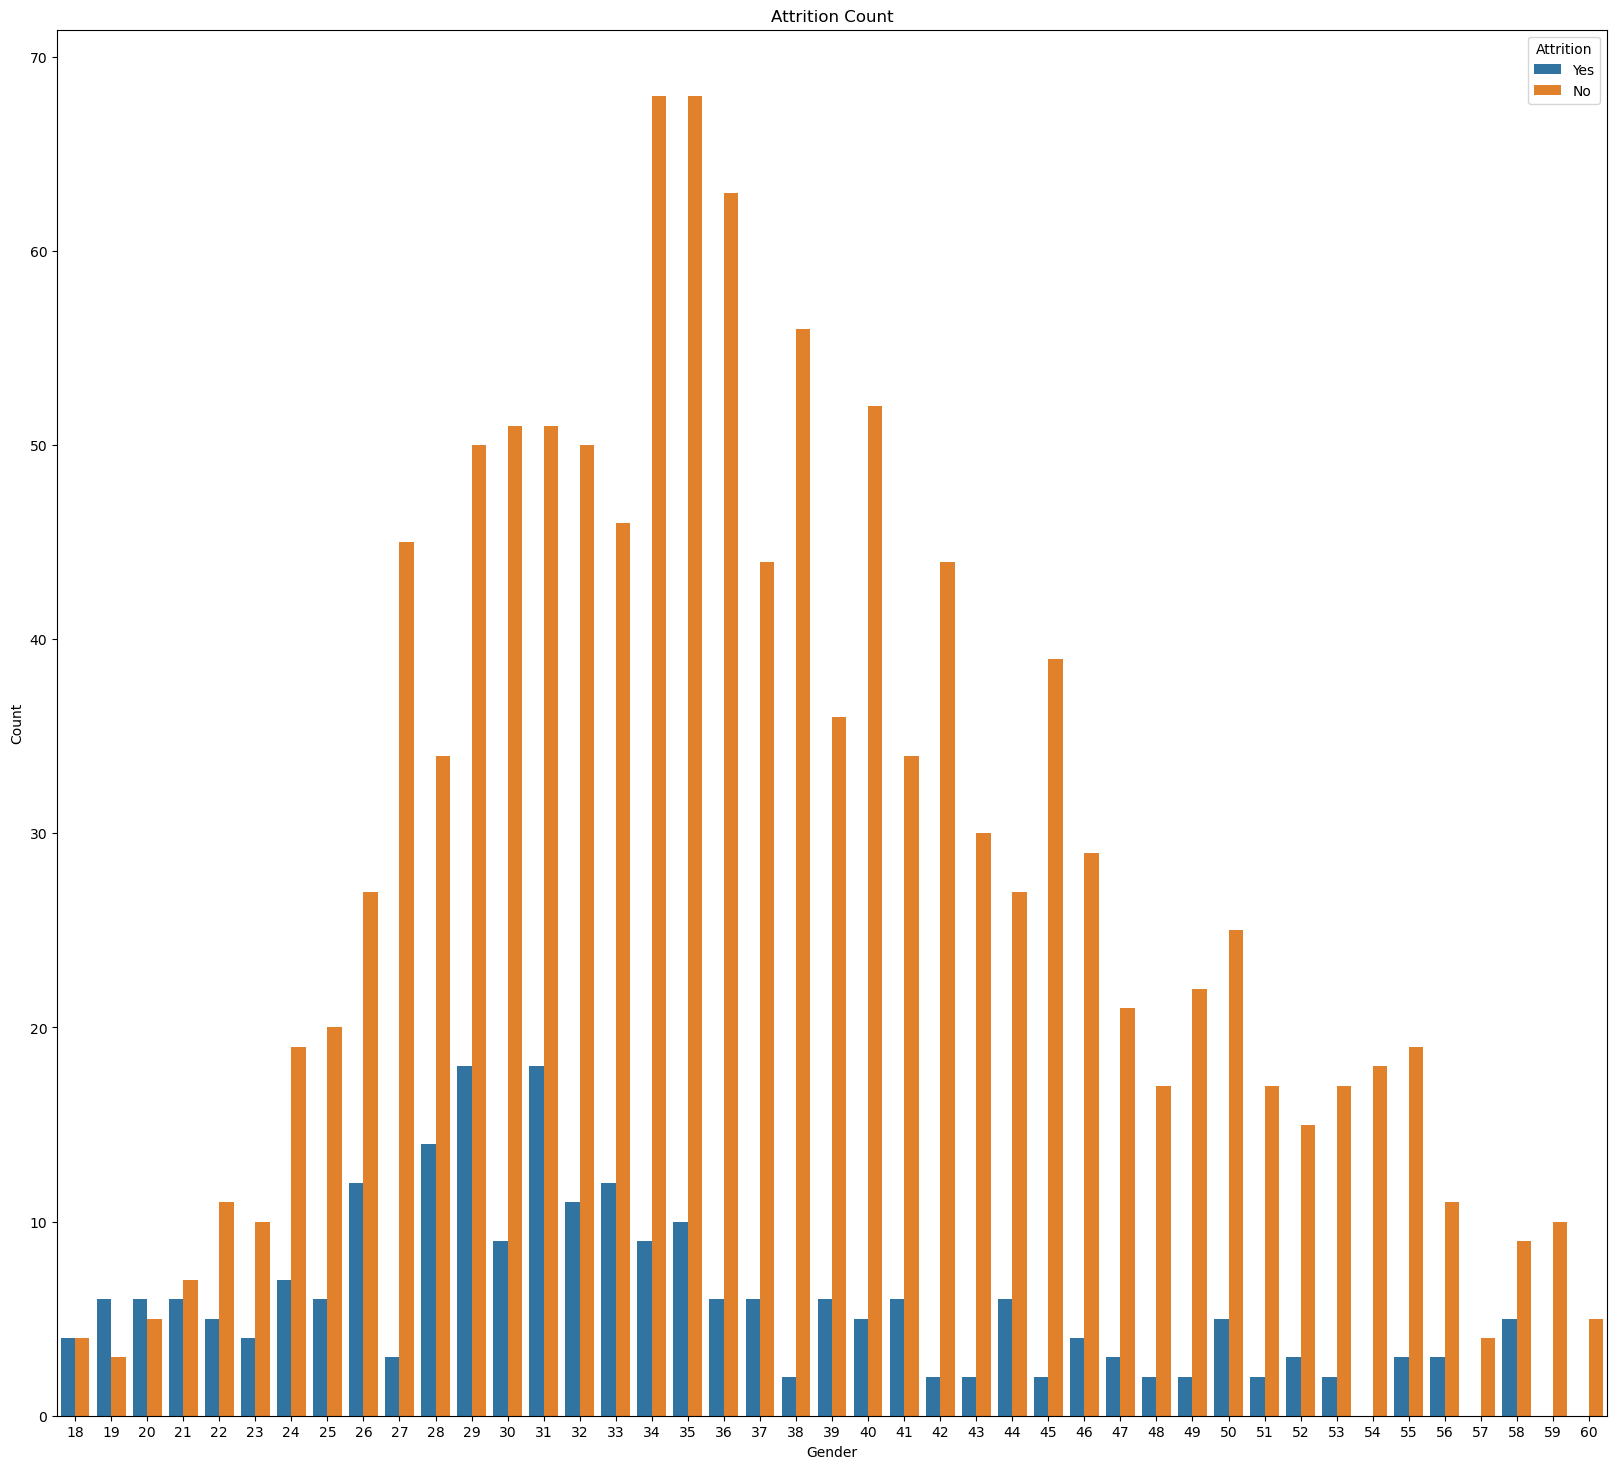

In [28]:
plt.figure(figsize=(20, 18))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Attrition Count')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

We can see that the attrition rate is quite high from 26 till 35 roughly

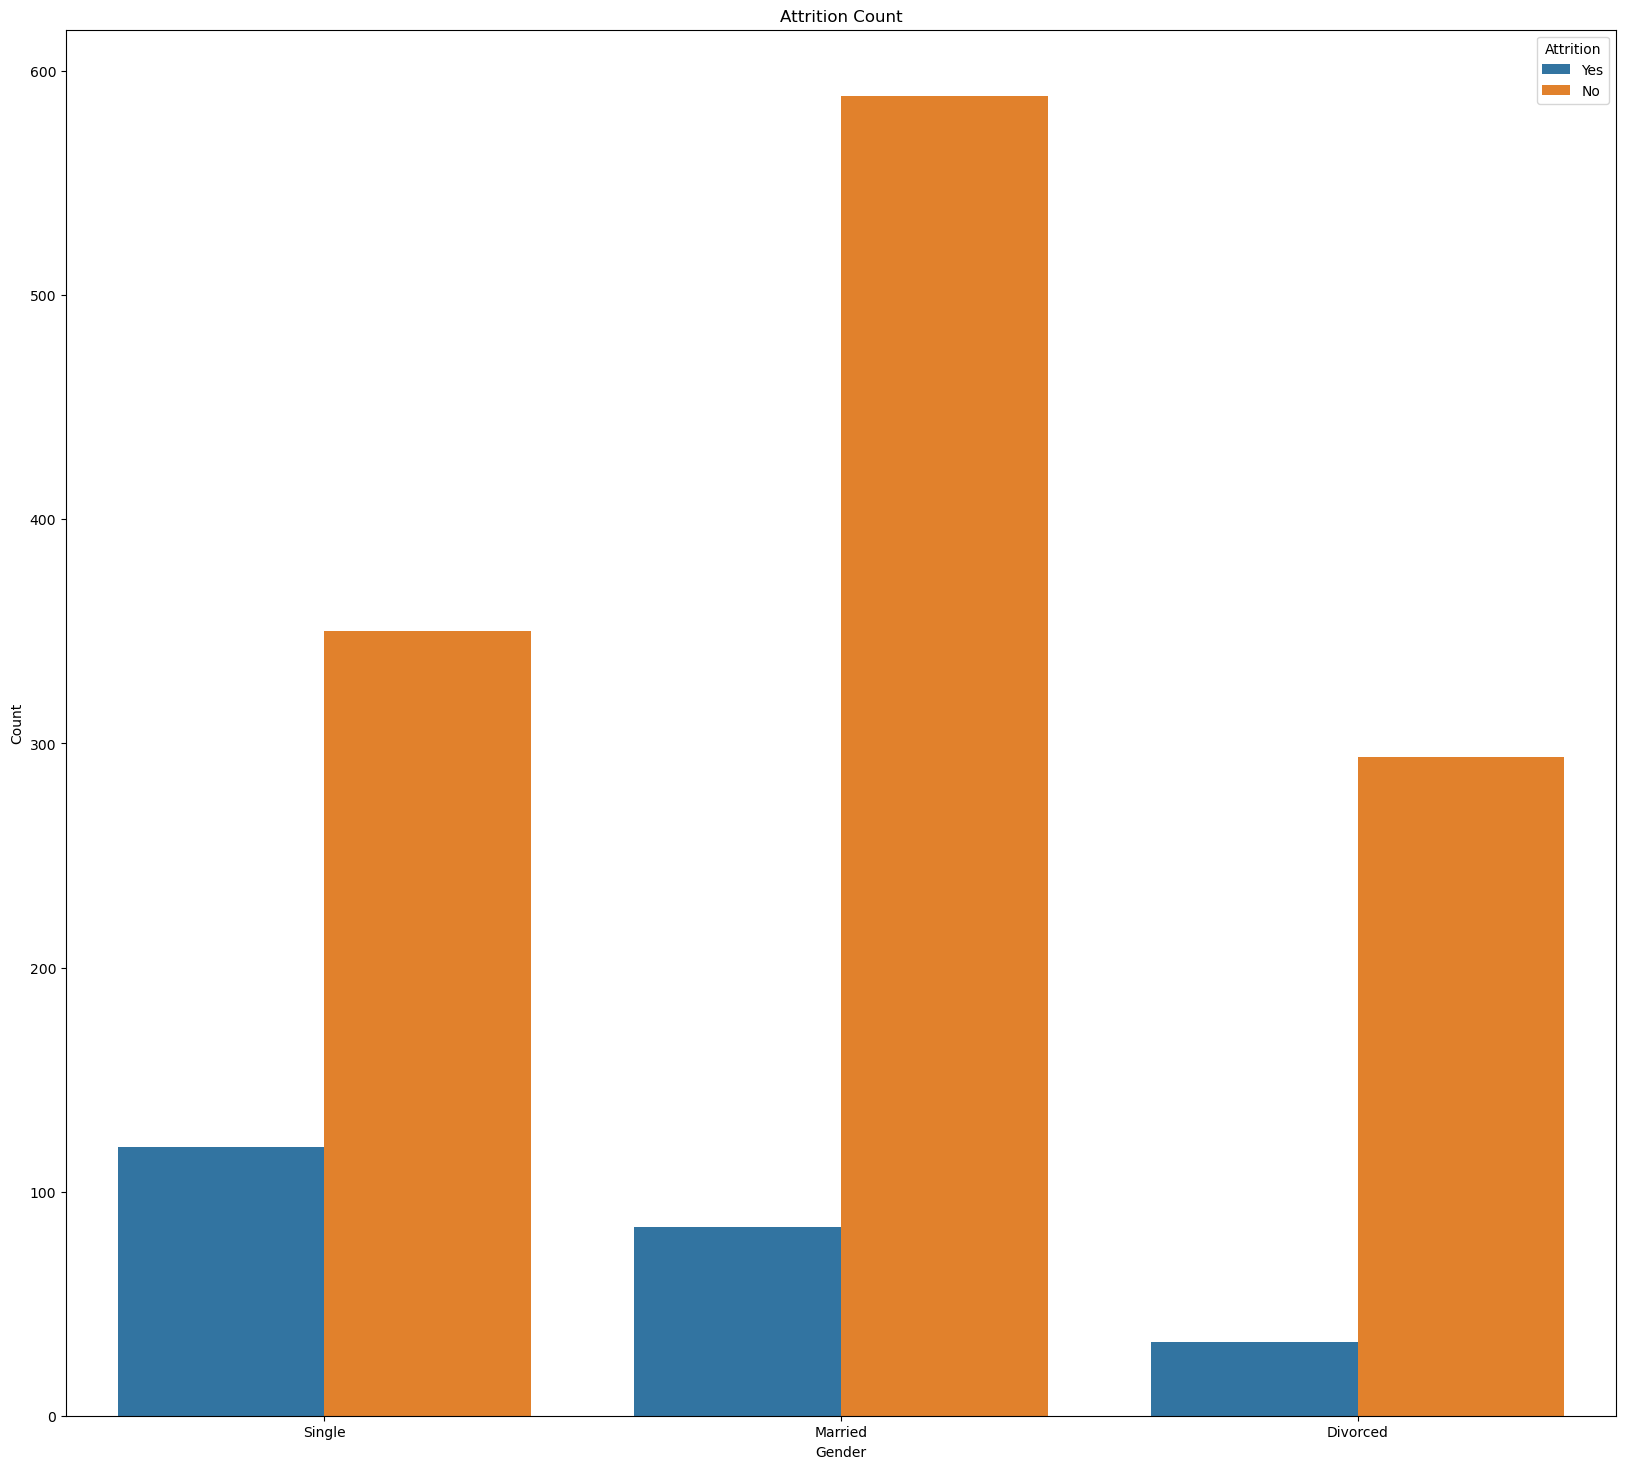

In [29]:
plt.figure(figsize=(20, 18))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition Count')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

In [30]:
#We can see that the attrition rate is quite high for Singles than married or divorce which seems to be valid given that married couple might have a lot of responsbility (house loan, personal loans, commitments etc compared to singles)

Job Characteristics
-BusinessTravel
-Department
-JobRole
-JobLevel
-JobSatisfaction

In [31]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [32]:
#Here we can see that majority of the worker does not travel frequently. Only 277 out of 1470 travel. 

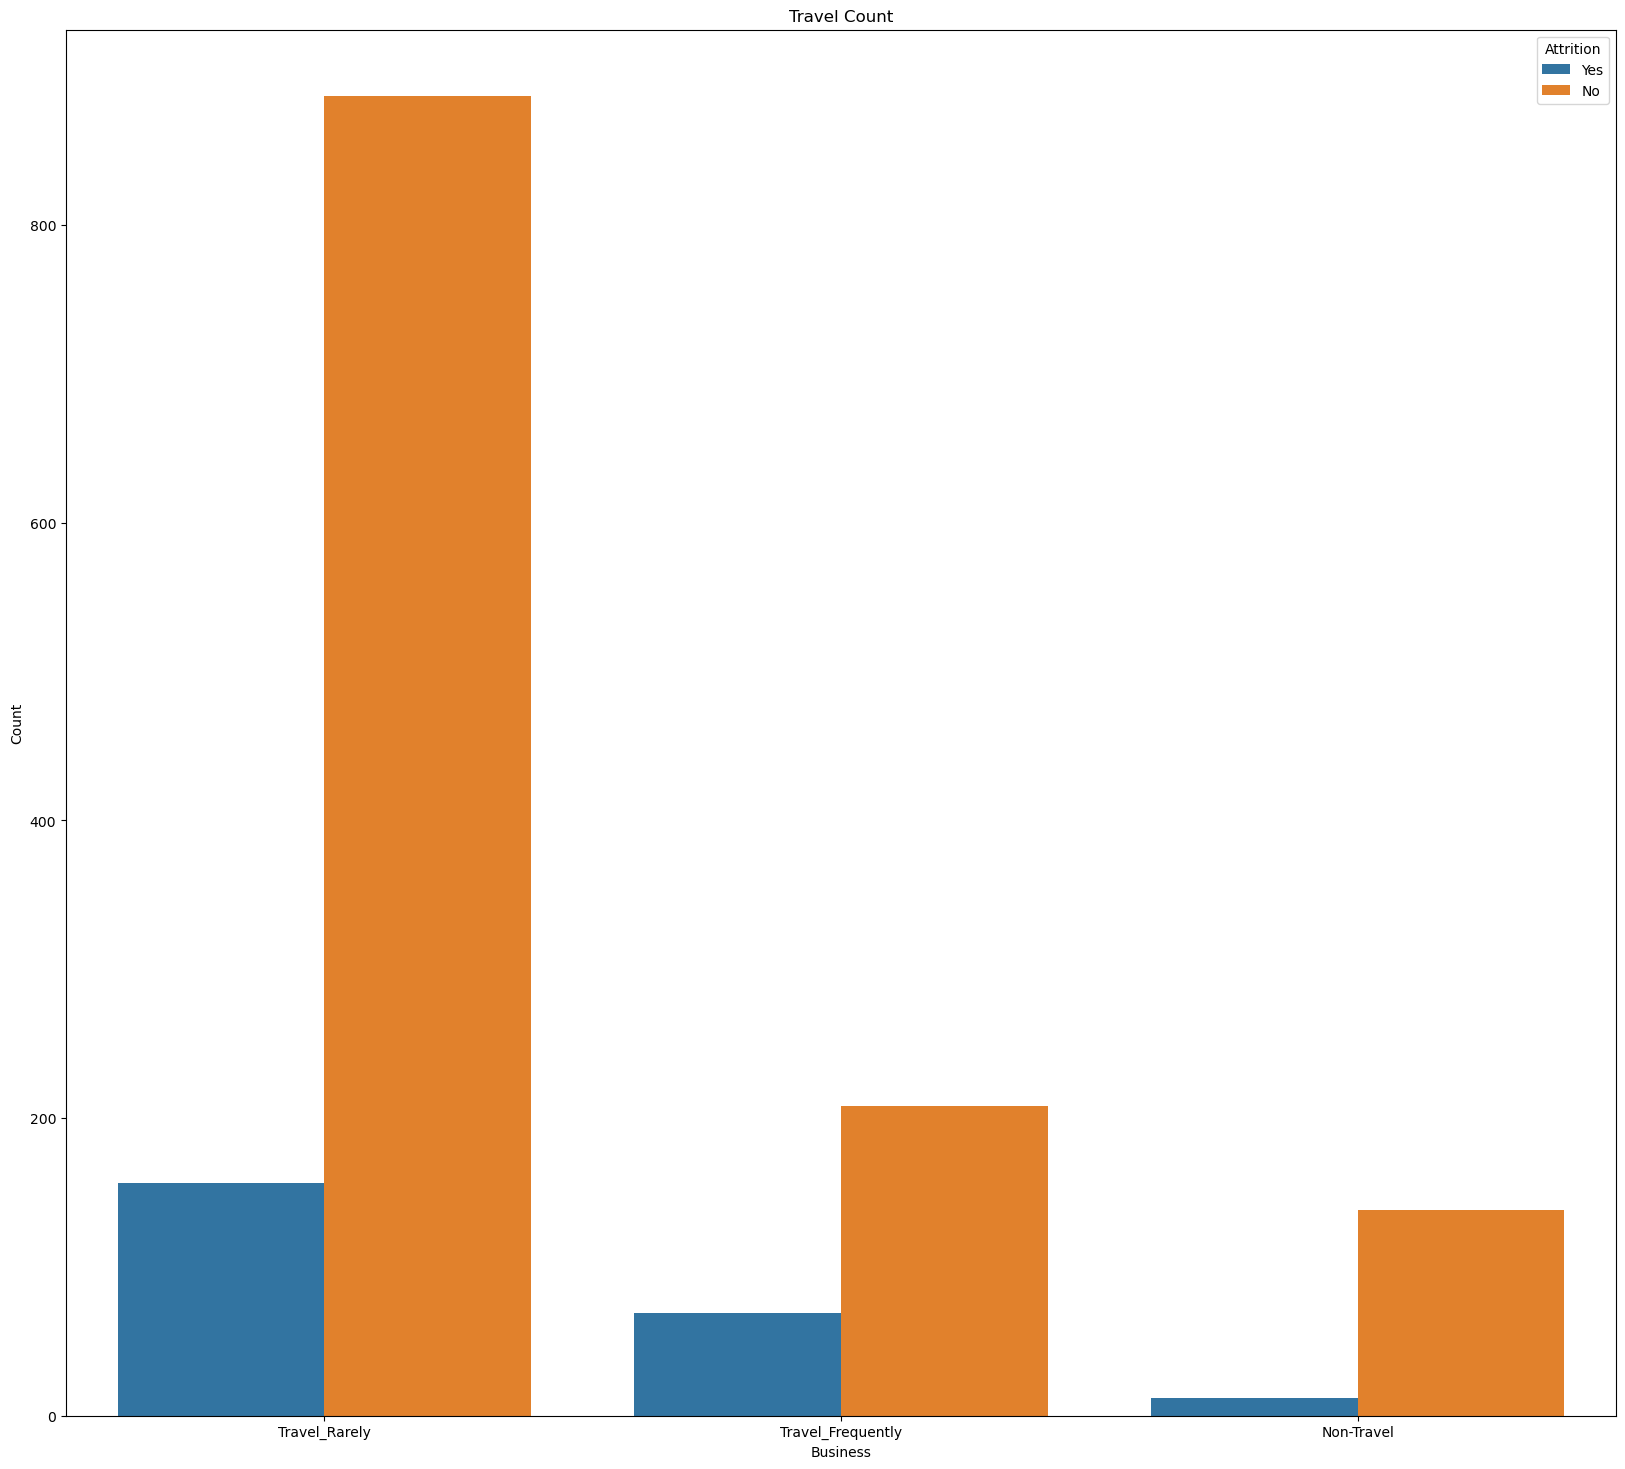

In [33]:
plt.figure(figsize=(20, 18))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Travel Count')
plt.ylabel('Count')
plt.xlabel('Business')
plt.show()

In [34]:
#here we can see that people who travel rarely has a higher attrition rate compared to those who travel frequently. 

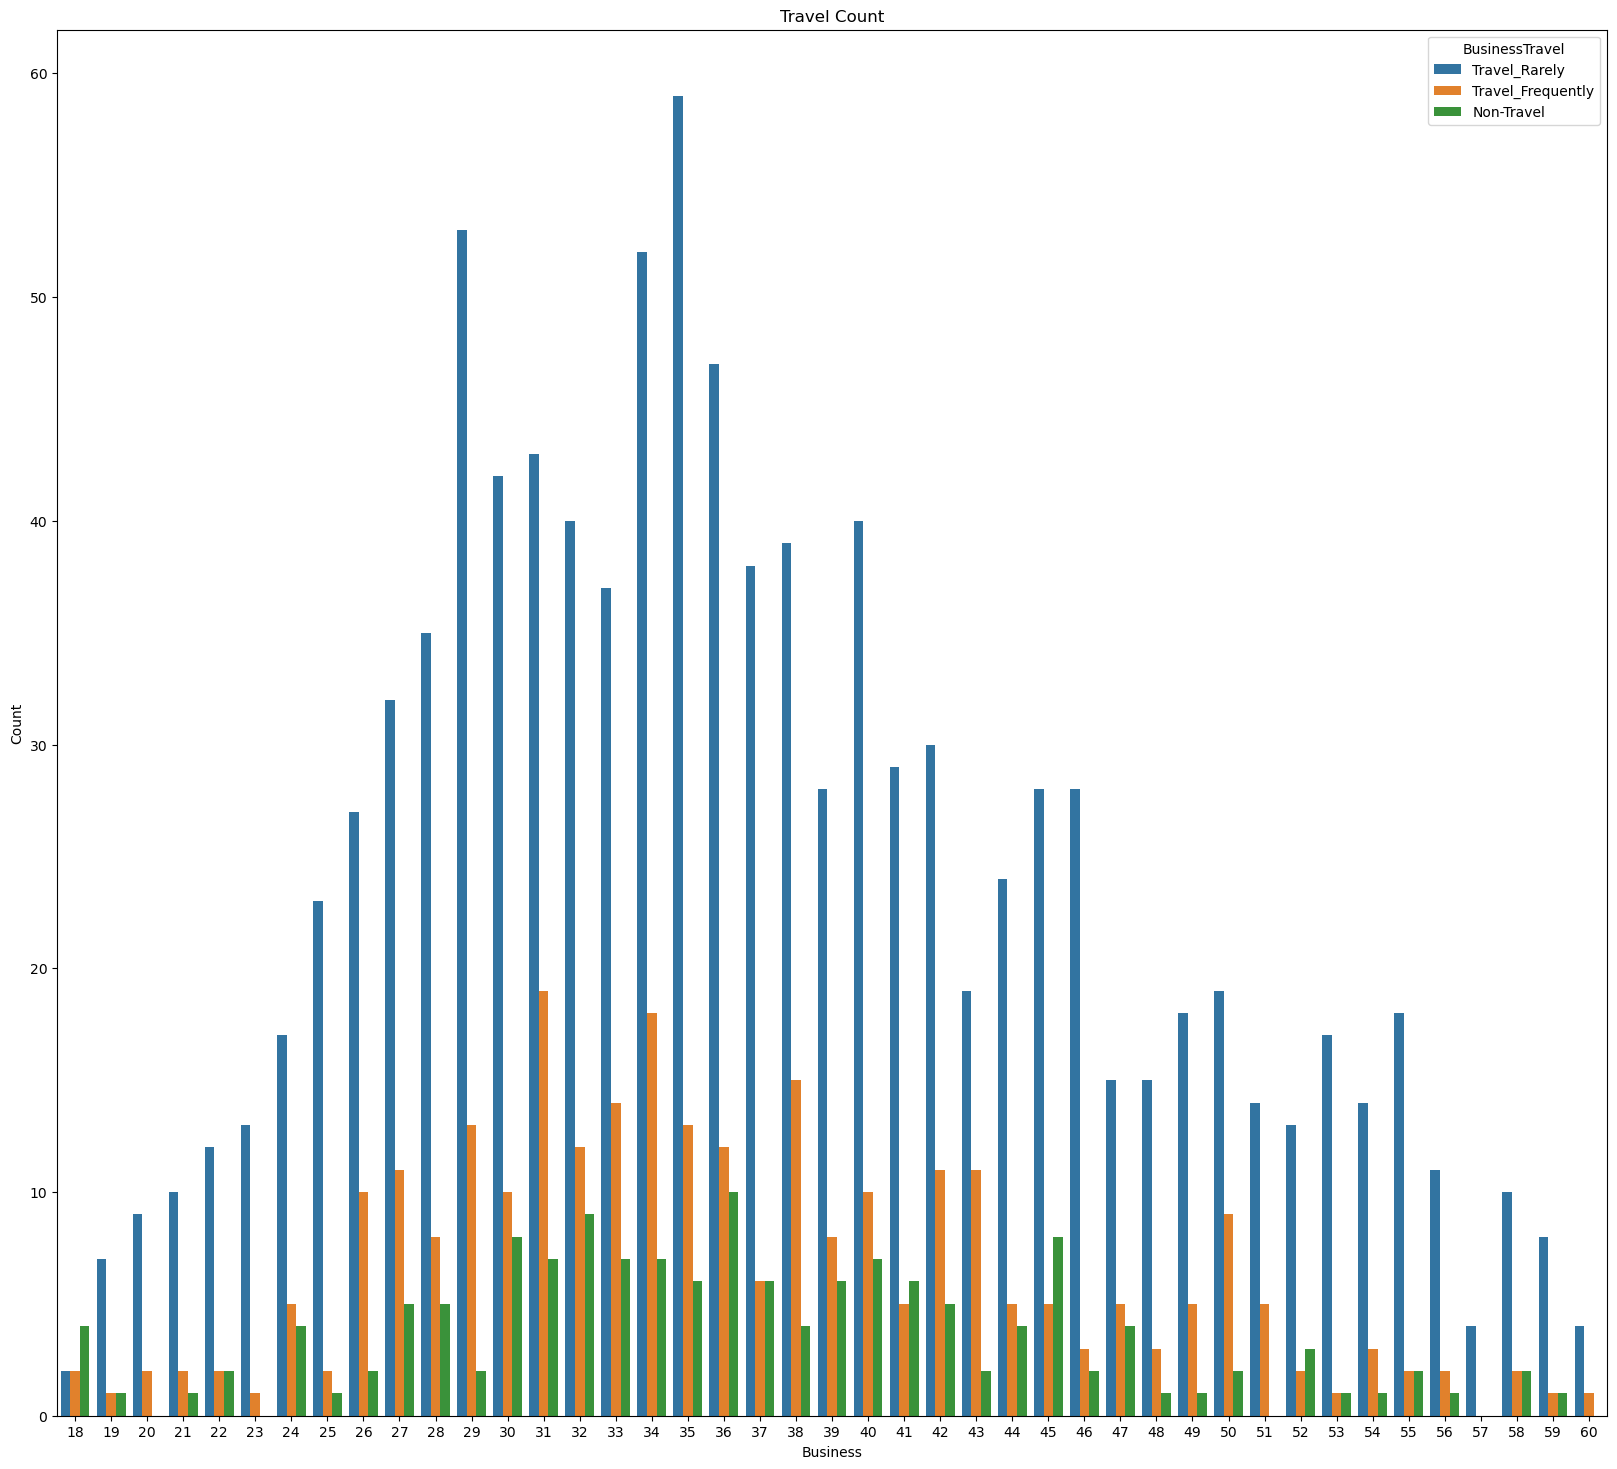

In [35]:
plt.figure(figsize=(20, 18))
sns.countplot(x='Age', hue='BusinessTravel', data=df)
plt.title('Travel Count')
plt.ylabel('Count')
plt.xlabel('Business')
plt.show()

People in between the ages from 29 to 38 seems to travel frequently. 

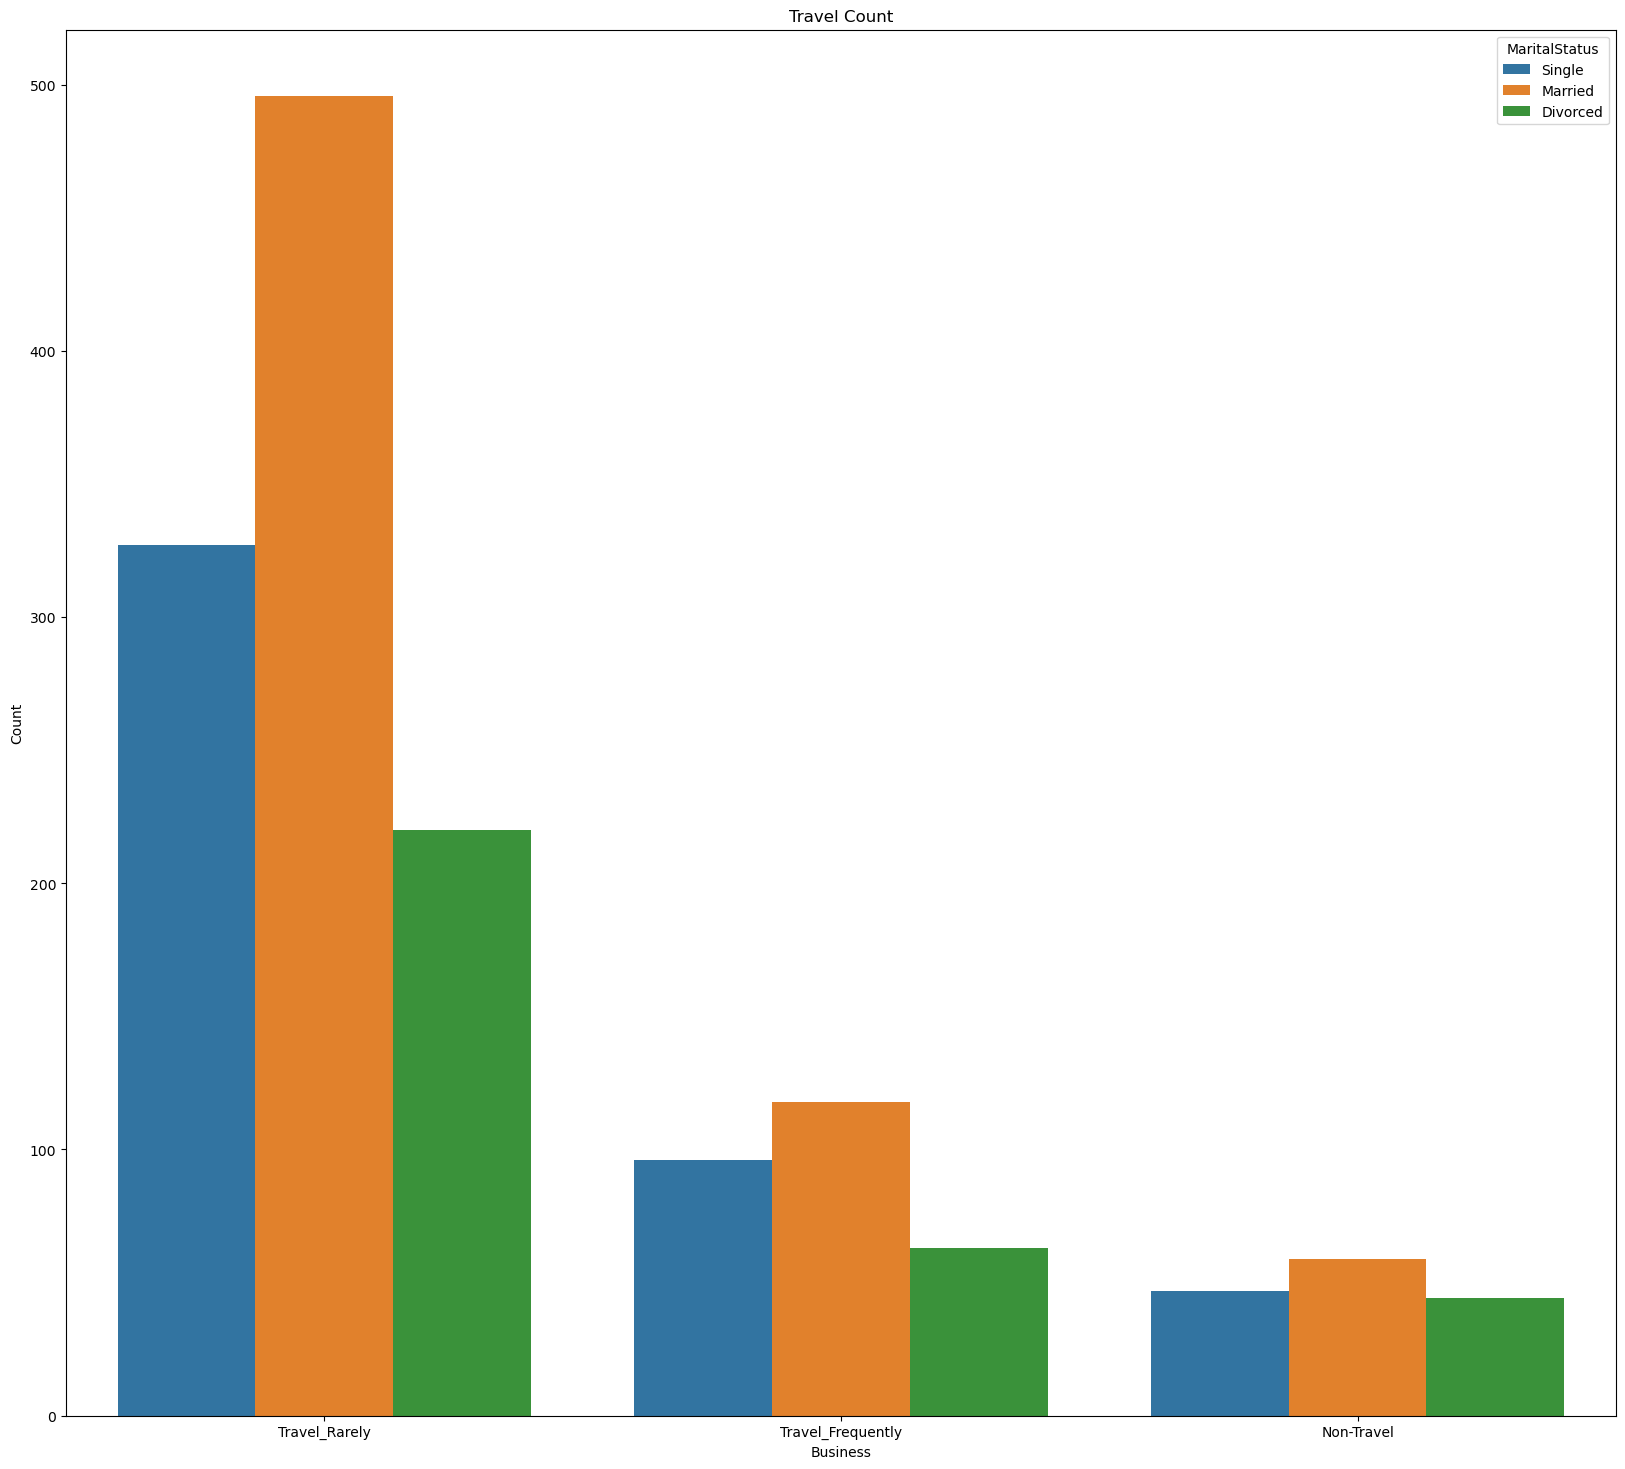

In [36]:
plt.figure(figsize=(20, 18))
sns.countplot(x='BusinessTravel', hue='MaritalStatus', data=df)
plt.title('Travel Count')
plt.ylabel('Count')
plt.xlabel('Business')
plt.show()

In [37]:
#Married people tends to travel more frequently compared to others. 

In [38]:
df['JobSatisfaction'].value_counts()
#JobSatisfaction: 1: Low, 2: 'Medium', 3: 'High', 4: 'Very High'

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

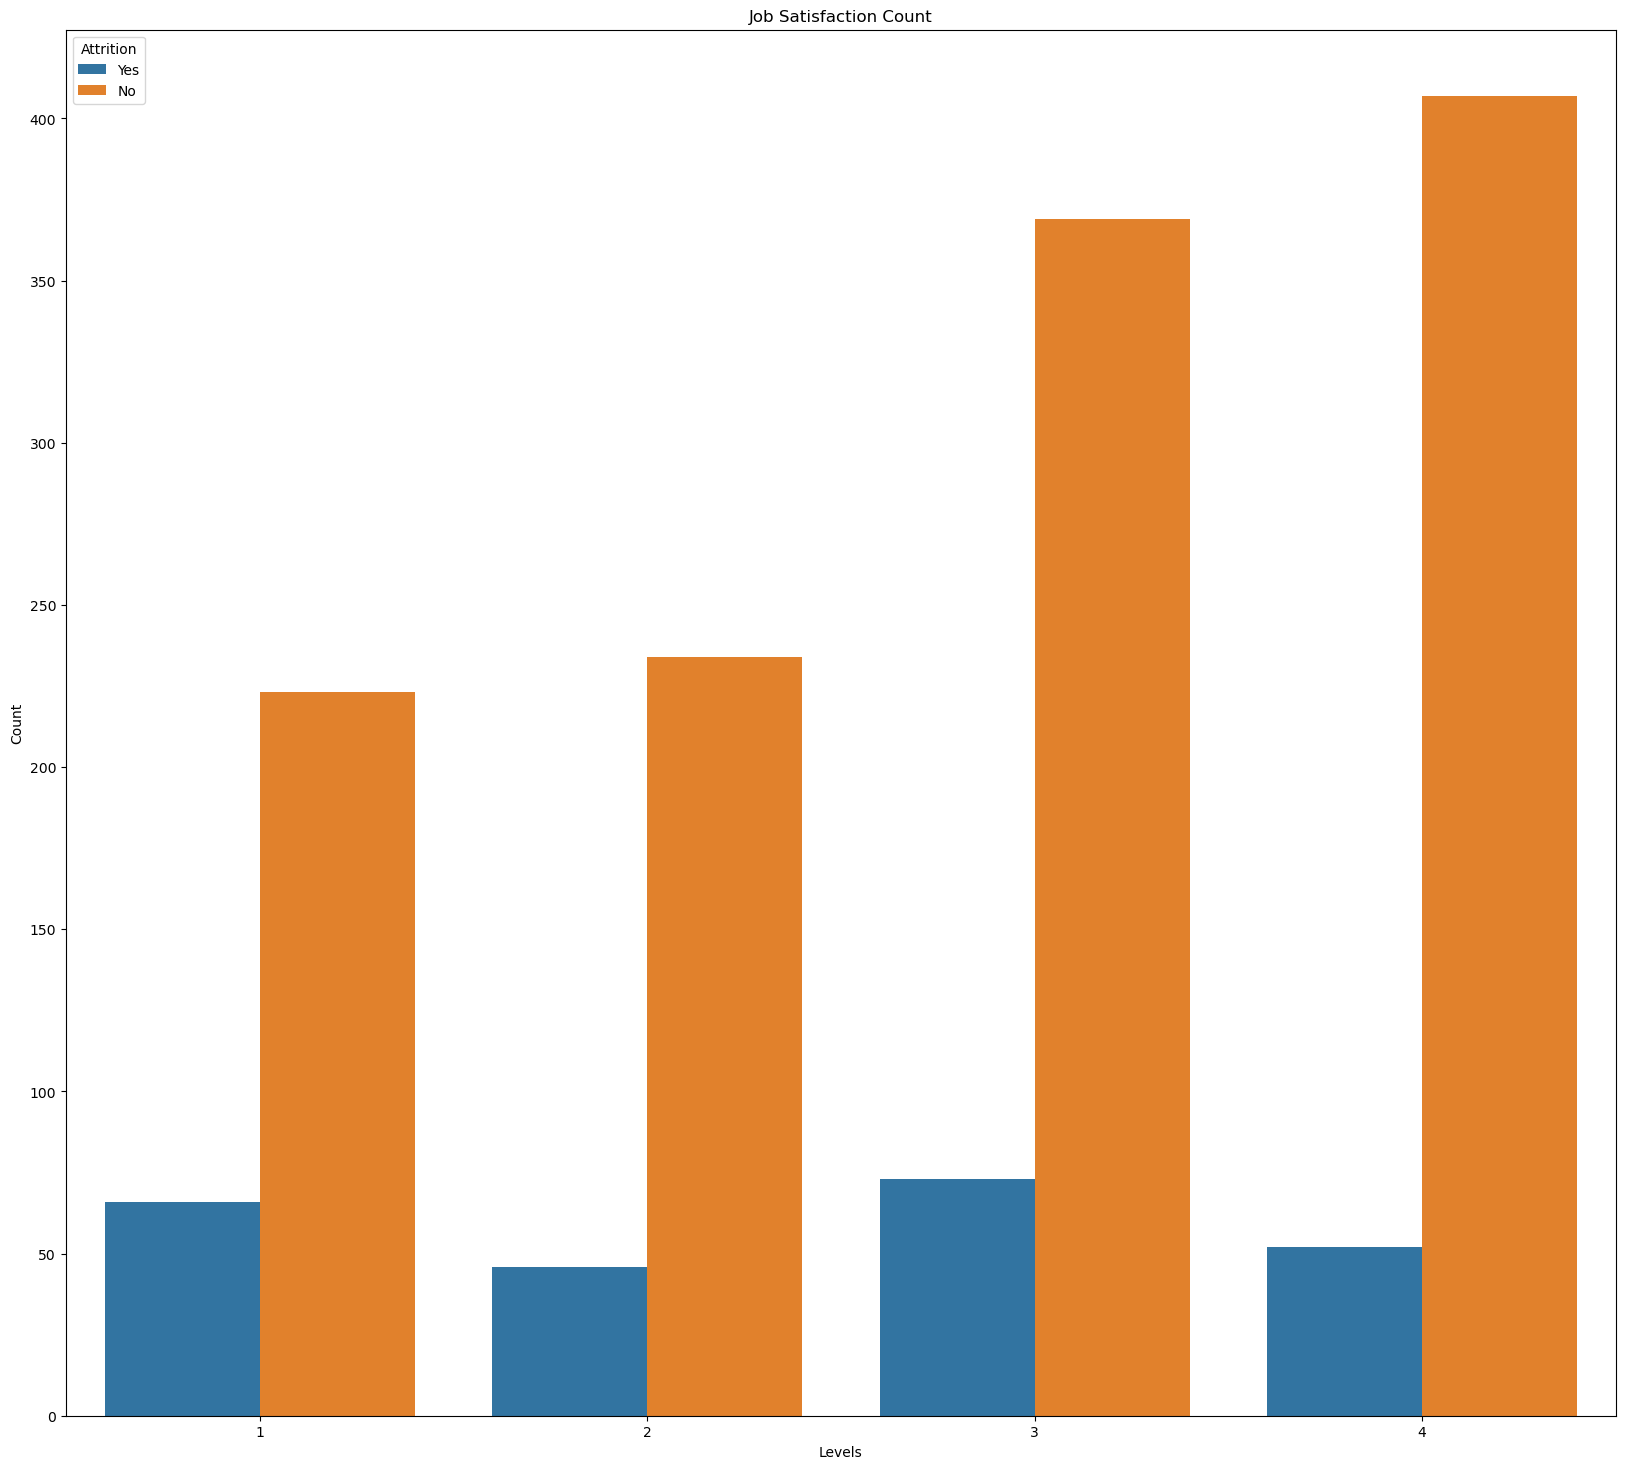

In [39]:
plt.figure(figsize=(20, 18))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction Count')
plt.ylabel('Count')
plt.xlabel('Levels')
plt.show()

In [40]:
#It is interesting to note that despite a 'high' satisfaction level, the attrition rates are higher for group 3

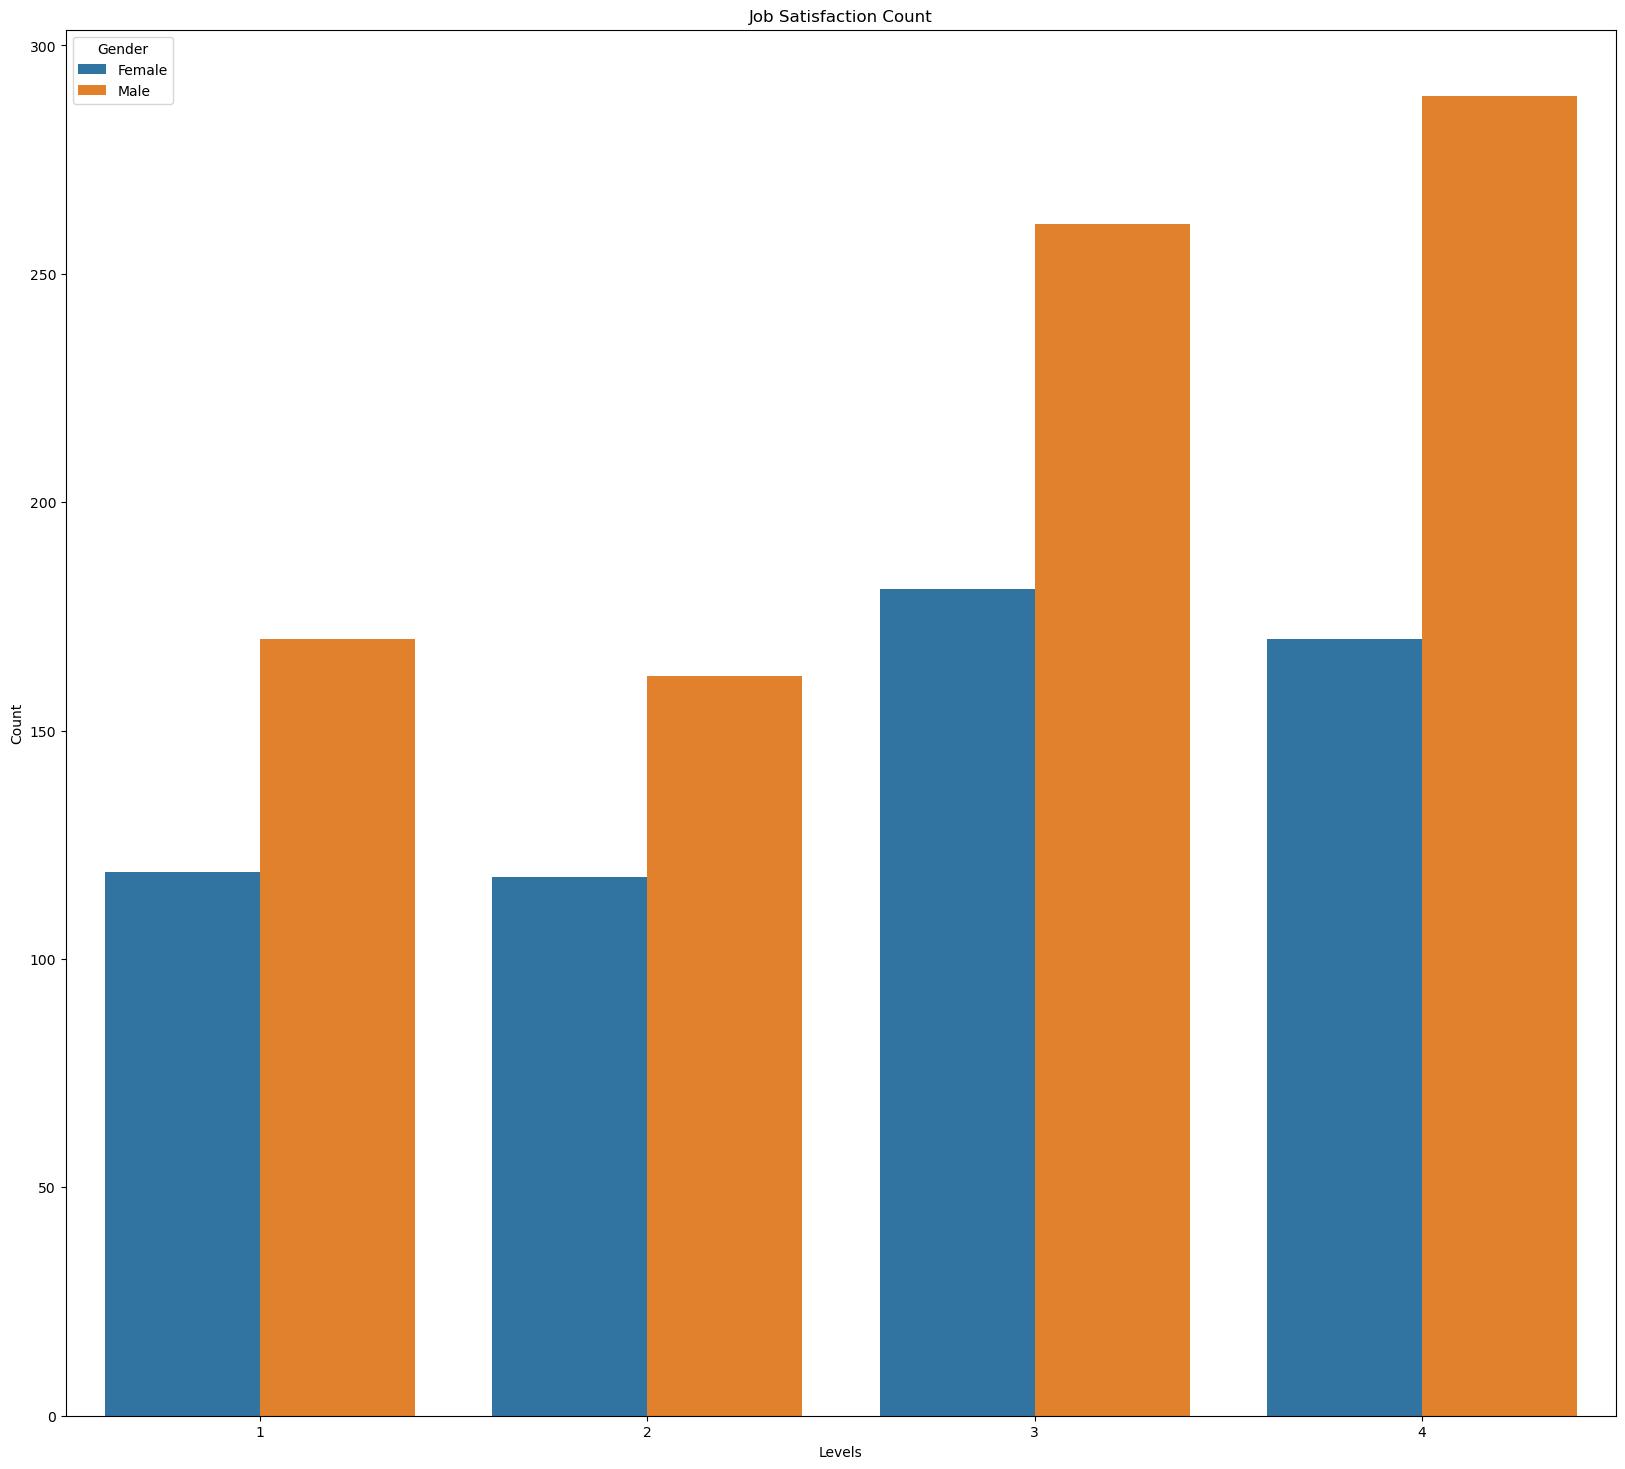

In [41]:
plt.figure(figsize=(20, 18))
sns.countplot(x='JobSatisfaction', hue='Gender', data=df)
plt.title('Job Satisfaction Count')
plt.ylabel('Count')
plt.xlabel('Levels')
plt.show()

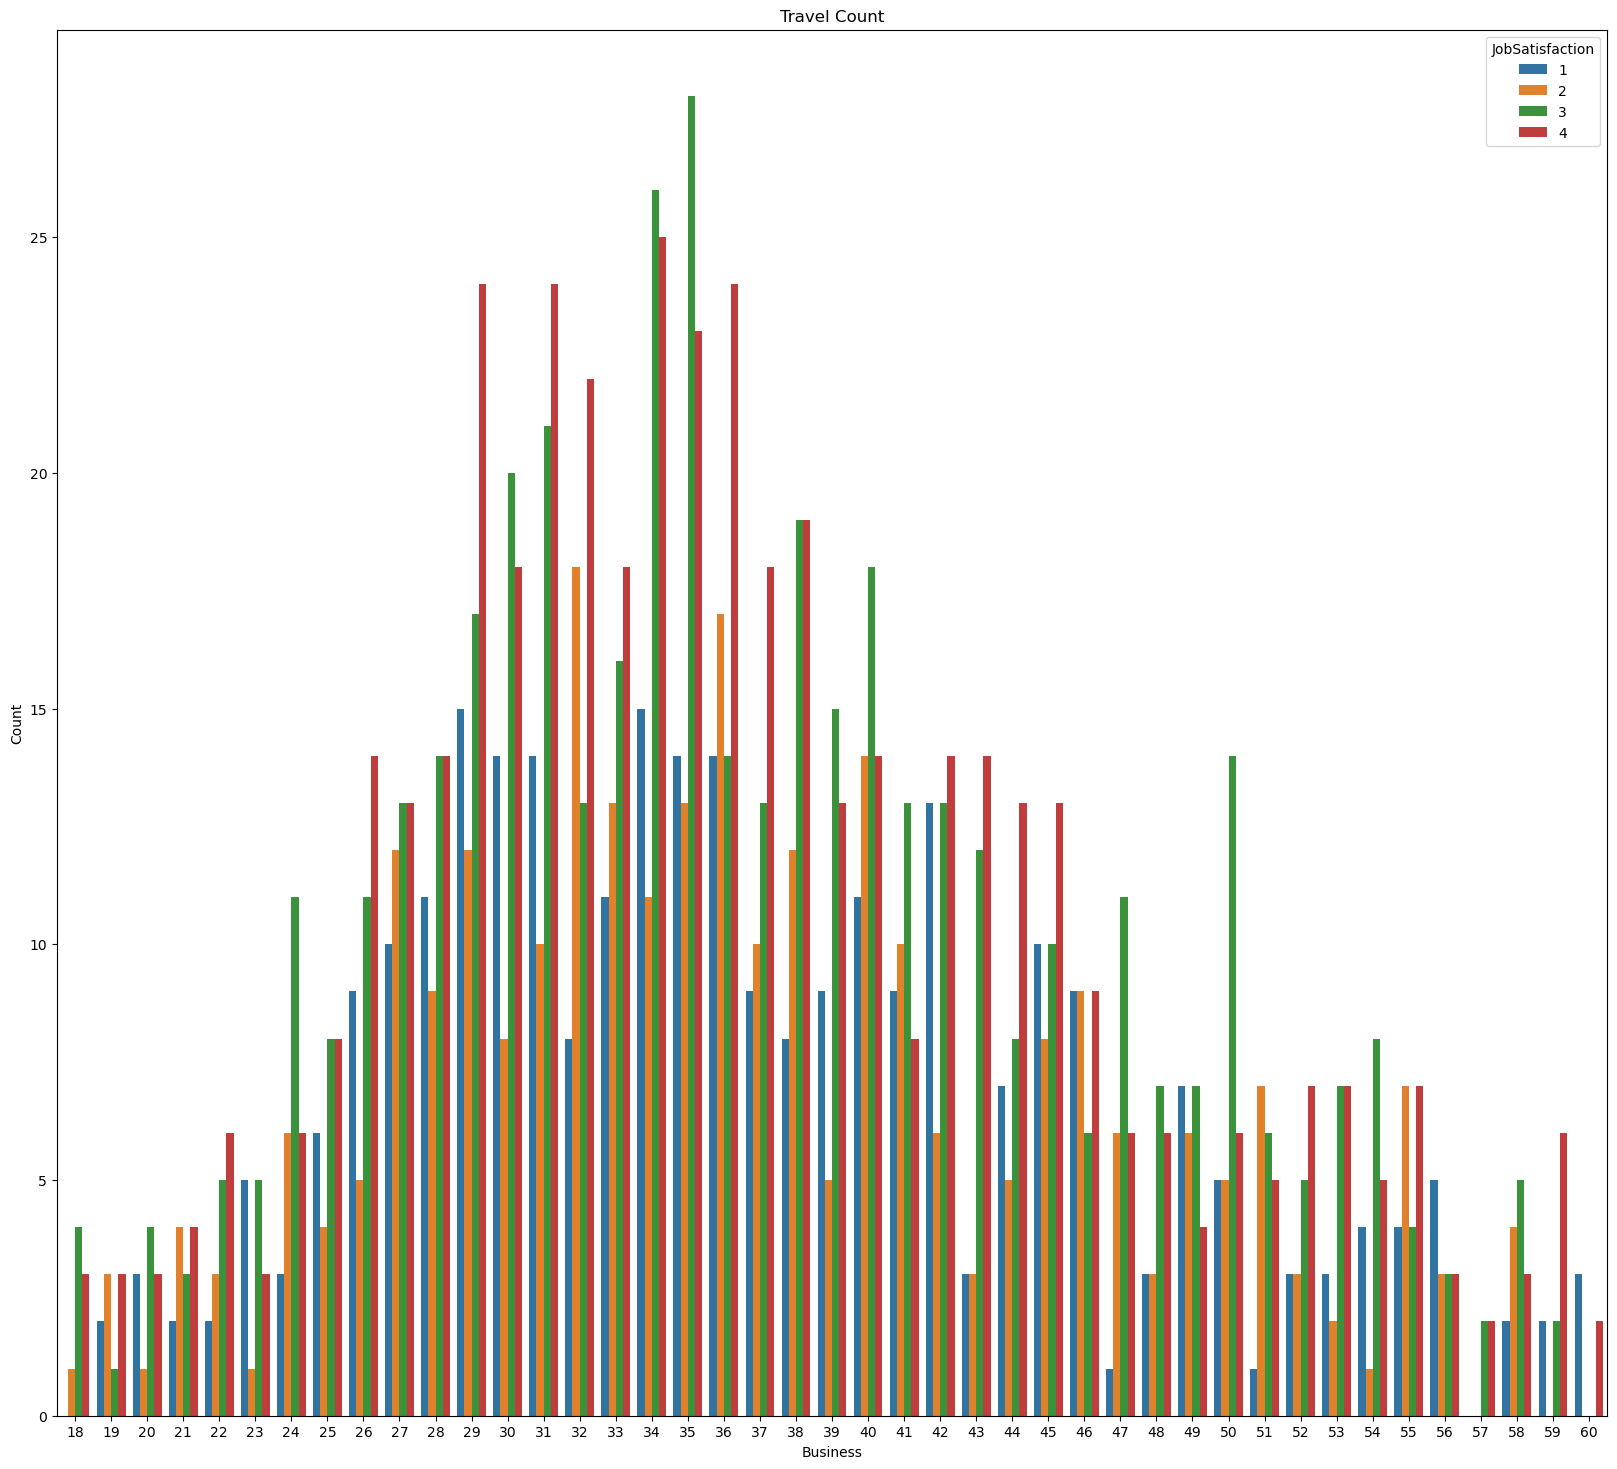

In [42]:
plt.figure(figsize=(20, 18))
sns.countplot(x='Age', hue='JobSatisfaction', data=df)
plt.title('Travel Count')
plt.ylabel('Count')
plt.xlabel('Business')
plt.show()

In [43]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [44]:
#A lot of the people are working in the top level such as Sales Executive, Research Scientist & Lab Tech

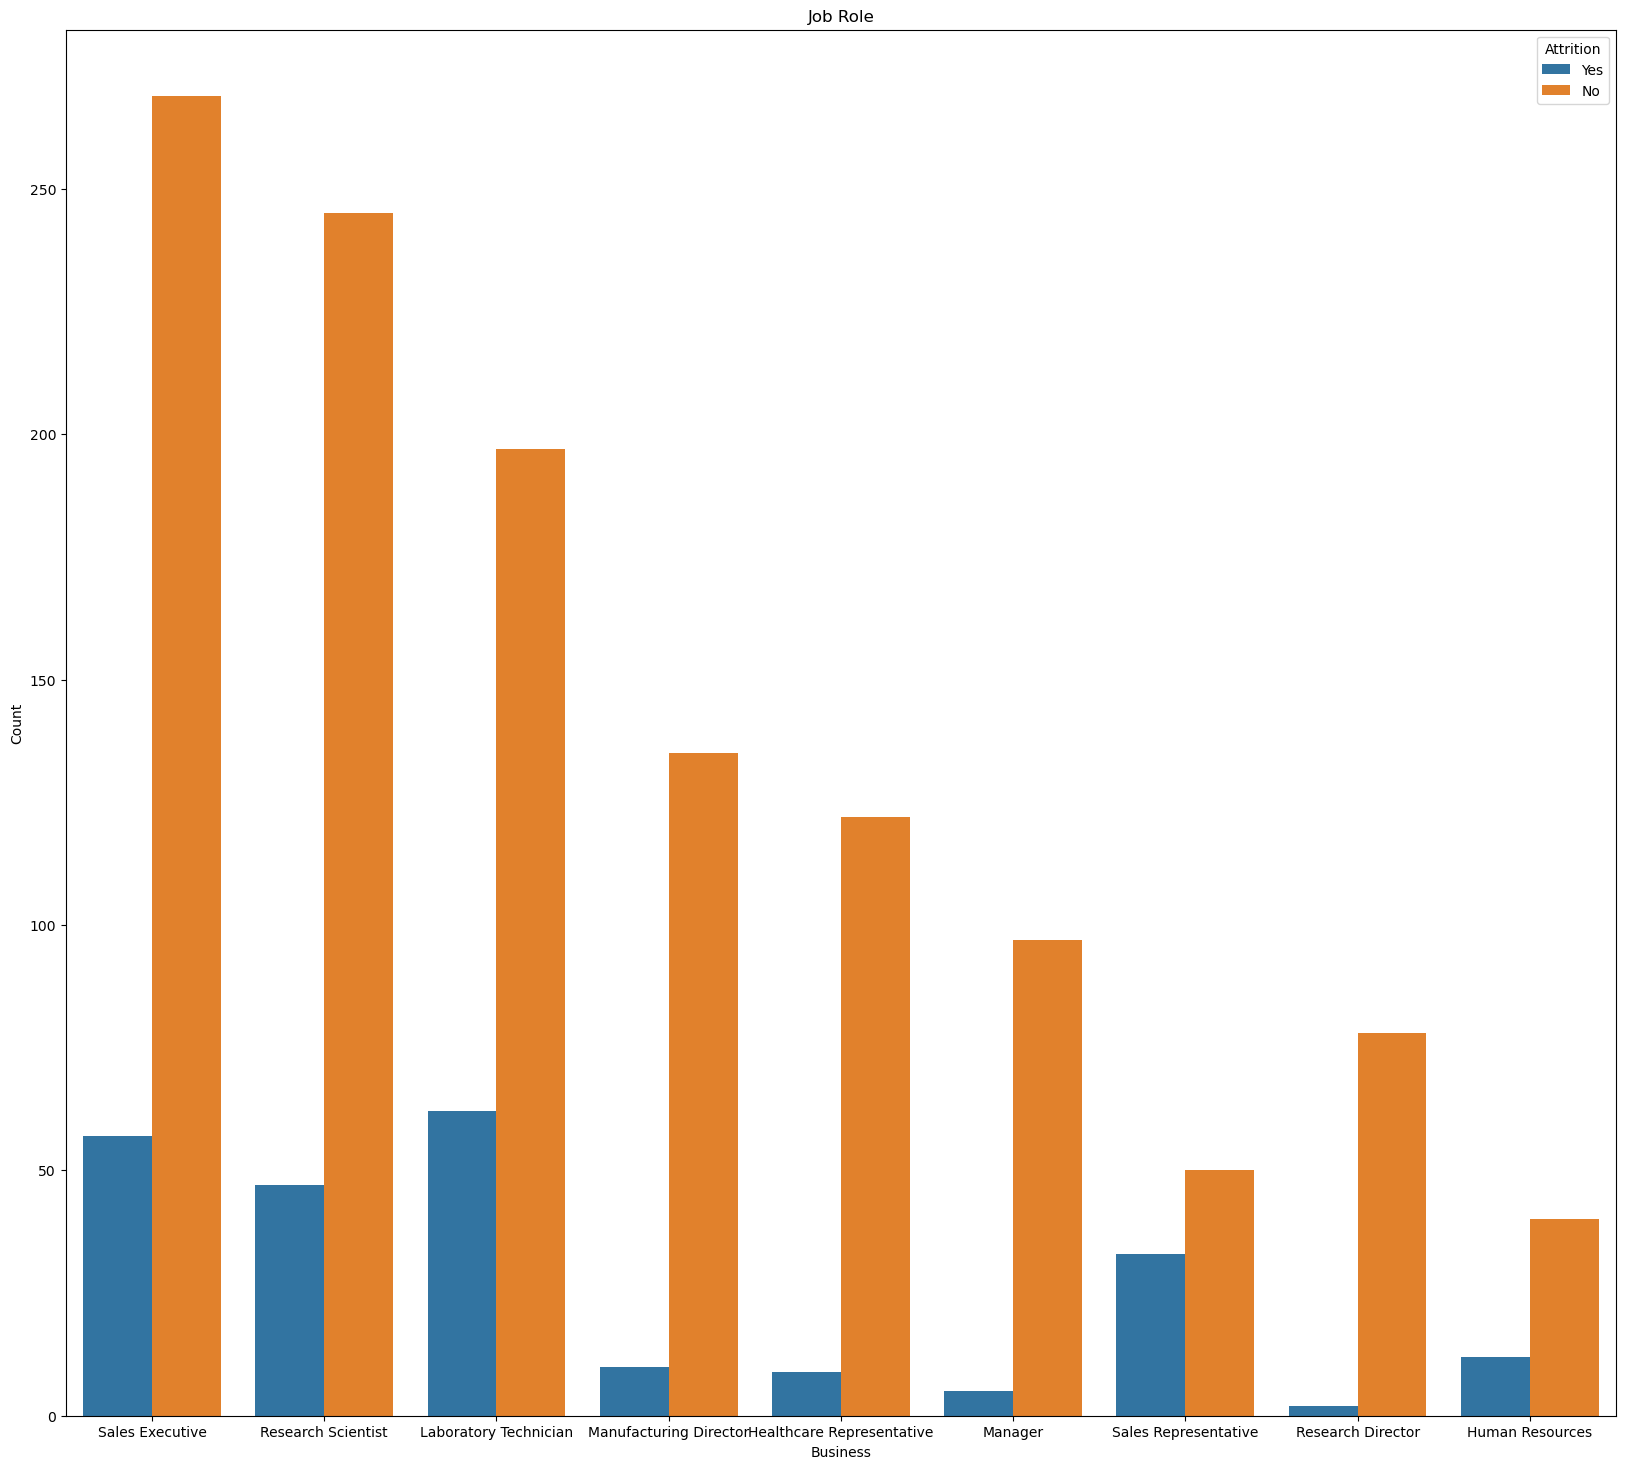

In [45]:
plt.figure(figsize=(20, 18))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Job Role')
plt.ylabel('Count')
plt.xlabel('Business')
plt.show()

In [46]:
#Seems like the attrition rate is also in the categories wherein the majority of the people works! but also in Sales representative.

In [47]:
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [48]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True)

Attrition                                           No  Yes   All
JobRole                   Department                             
Healthcare Representative Research & Development   122    9   131
Human Resources           Human Resources           40   12    52
Laboratory Technician     Research & Development   197   62   259
Manager                   Human Resources           11    0    11
                          Research & Development    51    3    54
                          Sales                     35    2    37
Manufacturing Director    Research & Development   135   10   145
Research Director         Research & Development    78    2    80
Research Scientist        Research & Development   245   47   292
Sales Executive           Sales                    269   57   326
Sales Representative      Sales                     50   33    83
All                                               1233  237  1470

In [49]:
#here we can see that there is a higher attrition rate within the Sales department for roles such as the Sales Executive & Sales representation. Overall, 90 people! Followed by the Research & Development Department and especially for Lab technicians.

In [50]:
pd.crosstab([df.Department],[df.EducationField], margins=True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


Insights:

Here we can see that 41% of the employees possess a life science background and 31% posses a medical profession backgroun and this is clease since the number is quite huge under research and development. 
It is also interesting to note that some people with the life science or medical degree are working under sales which seems there might be the idea of job satisfaction given the level of degree they hold. 

In [51]:
pd.crosstab([df.Department],[df.Education], margins=True)

Education,1,2,3,4,5,All
Department,,,,,,
Human Resources,5,13,27,15,3,63
Research & Development,115,182,379,255,30,961
Sales,50,87,166,128,15,446
All,170,282,572,398,48,1470


In [52]:
#Here we can see that within HR, 71% of the employee holds a degree and above. 

In [53]:
pd.crosstab([df.Department,df.Education], [df.JobRole],margins=True)

JobRole                           Healthcare Representative  Human Resources  \
Department             Education                                               
Human Resources        1                                  0                5   
                       2                                  0               12   
                       3                                  0               22   
                       4                                  0               10   
                       5                                  0                3   
Research & Development 1                                 15                0   
                       2                                 21                0   
                       3                                 48                0   
                       4                                 44                0   
                       5                                  3                0   
Sales                  1                                  0                0   
                       2                                  0                0   
                       3                                  0                0   
                       4                                  0                0   
                       5                                  0                0   
All                                                     131               52   

JobRole                           Laboratory Technician  Manager  \
Department             Education                                   
Human Resources        1                              0        0   
                       2                              0        1   
                       3                              0        5   
                       4                              0        5   
                       5                              0        0   
Research & Development 1                             35        6   
                       2                             57       12   
                       3                            104       21   
                       4                             58       13   
                       5                              5        2   
Sales                  1                              0        3   
                       2                              0        6   
                       3                              0       14   
                       4                              0       11   
                       5                              0        3   
All                                                 259      102   

JobRole                           Manufacturing Director  Research Director  \
Department             Education                                              
Human Resources        1                               0                  0   
                       2                               0                  0   
                       3                               0                  0   
                       4                               0                  0   
                       5                               0                  0   
Research & Development 1                              15                  7   
                       2                              33                 13   
                       3                              54                 30   
                       4                              38                 23   
                       5                               5                  7   
Sales                  1                               0                  0   
                       2                               0                  0   
                       3                               0                  0   
                       4                               0                  0   
                       5                               0              

In [54]:
#Here we can see that a lot of employees within the Sales department hold a degree or above which might be a reason of a higher attrition. Similarly for Lab technicians

In [55]:
pd.crosstab([df.JobRole,df.Education], [df.JobSatisfaction],margins=True)

JobSatisfaction                        1    2    3    4   All
JobRole                   Education                          
Healthcare Representative 1            3    1    6    5    15
                          2            7    3    5    6    21
                          3           11    7   12   18    48
                          4            5    8   18   13    44
                          5            0    0    2    1     3
Human Resources           1            0    1    3    1     5
                          2            2    5    1    4    12
                          3            5    7    4    6    22
                          4            1    3    5    1    10
                          5            2    0    0    1     3
Laboratory Technician     1            7    4    9   15    35
                          2           11   12   15   19    57
                          3           24   23   27   30   104
                          4           13    9   22   14    58
                          5            1    0    2    2     5
Manager                   1            2    0    6    1     9
                          2            2    1    5   11    19
                          3            8   11    9   12    40
                          4            8    8    6    7    29
                          5            1    1    1    2     5
Manufacturing Director    1            2    3    7    3    15
                          2            6    6   11   10    33
                          3            8   17   17   12    54
                          4            8    5   14   11    38
                          5            2    1    0    2     5
Research Director         1            0    3    2    2     7
                          2            3    3    3    4    13
                          3            8    4   10    8    30
                          4            2    5   10    6    23
                          5            2    1    2    2     7
Research Scientist        1            8    4    9   16    37
                          2           10    6   18   12    46
                          3           21   29   38   34   122
                          4           14   13   20   32    79
                          5            1    1    5    1     8
Sales Executive           1            4    4    8   11    27
                          2           10   14   18   24    66
                          3           30   21   35   34   120
                          4           21   14   27   39   101
                          5            4    1    3    4    12
Sales Representative      1            6    6    6    2    20
                          2            1    4    7    3    15
                          3            3    9    9   11    32
                          4            2    2    5    7    16
All                                  289  280  442  459  1470

In [56]:
#here we can also see the link between job attrition and job satisfaction since attrition rates were high for lab technician, research scientist, sales exec and sales rep and if we loook at the job satisfaction of level 1 which somewhat suggest the reason for attrition

Compensation and Benefits
-DailyRate
-HourlyRate
-MonthlyIncome
-MonthlyRate
-PercentSalaryHike
-PerformanceRating
-StockOptionLevel

In [57]:
Numeric=['DailyRate','HourlyRate', 'MonthlyIncome','MonthlyRate',
          'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel' ]
for n in Numeric:
    print(df[n].value_counts())
    print("="*100)

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64
HourlyRate
66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: count, Length: 71, dtype: int64
MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64
MonthlyRate
4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: count, Length: 1427, dtype: int64
PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64


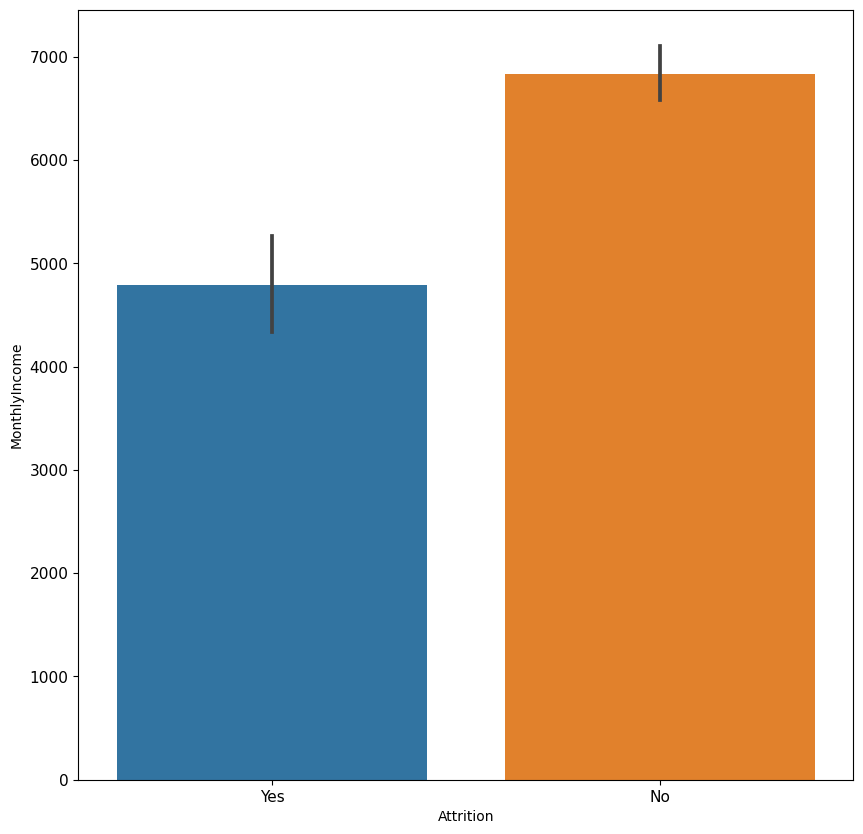

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [59]:
#Here we can see that attrition is higher when income is less than 6700 (approx)

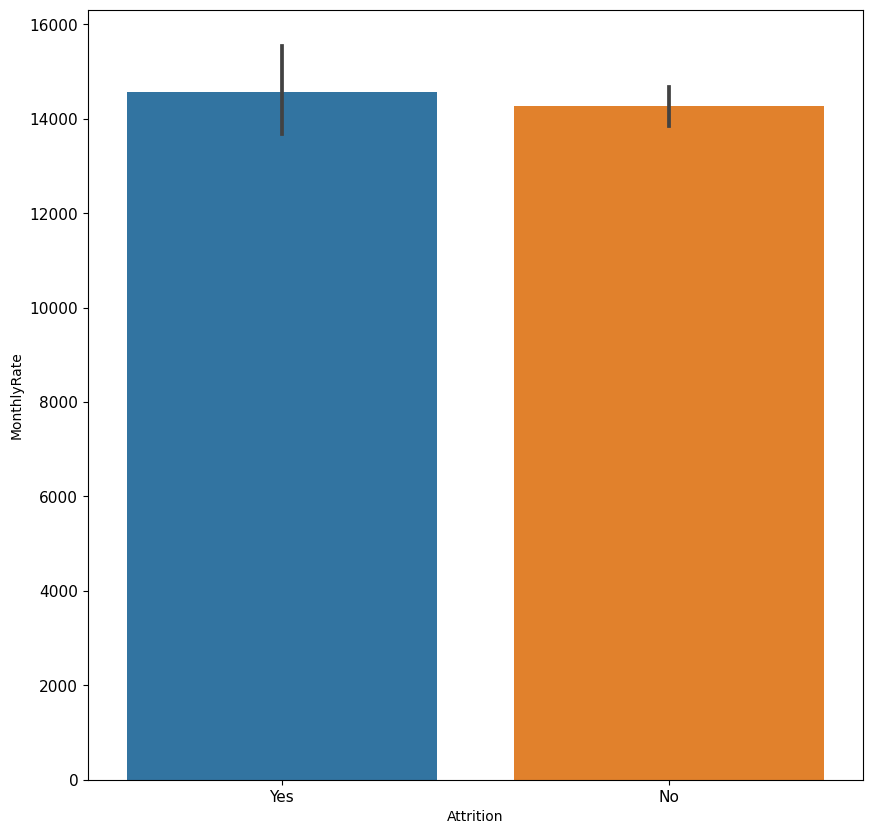

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(x='Attrition',y='MonthlyRate',data=df)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [61]:
pd.crosstab([df.Attrition,df.JobRole], [df.MonthlyIncome],margins=True)

MonthlyIncome                        1009  1051  1052  1081  1091  1102  1118  \
Attrition JobRole                                                               
No        Healthcare Representative     0     0     0     0     0     0     0   
          Human Resources               0     0     0     0     0     0     0   
          Laboratory Technician         0     0     0     0     0     0     0   
          Manager                       0     0     0     0     0     0     0   
          Manufacturing Director        0     0     0     0     0     0     0   
          Research Director             0     0     0     0     0     0     0   
          Research Scientist            0     1     0     0     0     0     0   
          Sales Executive               0     0     0     0     0     0     0   
          Sales Representative          0     0     1     0     0     0     0   
Yes       Healthcare Representative     0     0     0     0     0     0     0   
          Human Resources               0     0     0     0     0     0     0   
          Laboratory Technician         0     0     0     0     0     1     0   
          Manager                       0     0     0     0     0     0     0   
          Manufacturing Director        0     0     0     0     0     0     0   
          Research Director             0     0     0     0     0     0     0   
          Research Scientist            1     0     0     0     0     0     0   
          Sales Executive               0     0     0     0     0     0     0   
          Sales Representative          0     0     0     1     1     0     1   
All                                     1     1     1     1     1     1     1   

MonthlyIncome                        1129  1200  1223  1232  1261  1274  1281  \
Attrition JobRole                                                               
No        Healthcare Representative     0     0     0     0     0     0     0   
          Human Resources               0     0     0     0     0     0     0   
          Laboratory Technician         1     0     0     0     0     0     1   
          Manager                       0     0     0     0     0     0     0   
          Manufacturing Director        0     0     0     0     0     0     0   
          Research Director             0     0     0     0     0     0     0   
          Research Scientist            0     0     1     1     0     1     0   
          Sales Executive               0     0     0     0     0     0     0   
          Sales Representative          0     1     0     0     0     0     0   
Yes       Healthcare Representative     0     0     0     0     0     0     0   
          Human Resources               0     0     0     0     0     0     0   
          Laboratory Technician         0     0     0     0     0     0     0   
          Manager                       0     0     0     0     0     0     0   
          Manufacturing Director        0     0     0     0     0     0     0   
          Research Director             0     0     0     0     0     0     0   
          Research Scientist            0     0     0     0     1     0     0   
          Sales Executive               0     0     0     0     0     0     0   
          Sales Representative          0     0     0     0     0     0     0   
All                                     1     1     1     1     1     1     1   

MonthlyIncome                        1359  1393  1416  1420  1483  1514  1555  \
Attrition JobRole                                                               
No        Healthcare Representative     0     0     0     0     0     0     0   
          Human Resources               0     0     0     0     0     0     0   
          Laboratory Technician         0     0     0     0     1     0     0   
          Manager                       0     0     0     0     0     0     0   
          Manufacturing Director        0     0     0     0     0     0     0   
          Research Director  

In [62]:
df['IncomeSplit'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print(df['IncomeSplit'].value_counts())

IncomeSplit
Low          369
Very High    368
High         367
Medium       366
Name: count, dtype: int64


In [63]:
IncomeAttrition_crosstab = pd.crosstab([df['Attrition'], df['JobRole']], df['IncomeSplit'], margins=True, margins_name="Total")
print(IncomeAttrition_crosstab)

IncomeSplit                          Low  Medium  High  Very High  Total
Attrition JobRole                                                       
No        Healthcare Representative    0      19    63         40    122
          Human Resources             14      11    12          3     40
          Laboratory Technician       92      83    22          0    197
          Manager                      0       0     0         97     97
          Manufacturing Director       0      28    65         42    135
          Research Director            0       0     0         78     78
          Research Scientist         119      97    28          1    245
          Sales Executive              0      64   136         69    269
          Sales Representative        36      12     2          0     50
Yes       Healthcare Representative    0       1     3          5      9
          Human Resources              9       1     0          2     12
          Laboratory Technician       38      21   

In [64]:
#Here we can see that income also plays a role in higher attrition rate! the montly income for some employees seems to be quite low and thus the higher attrition!

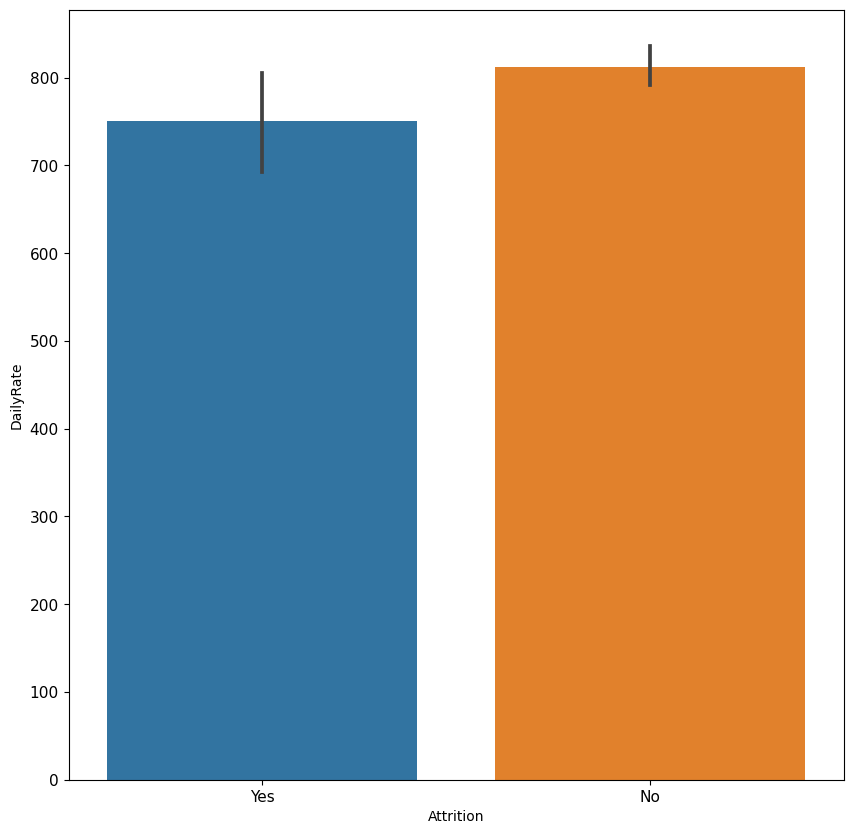

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(x='Attrition',y='DailyRate',data=df)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

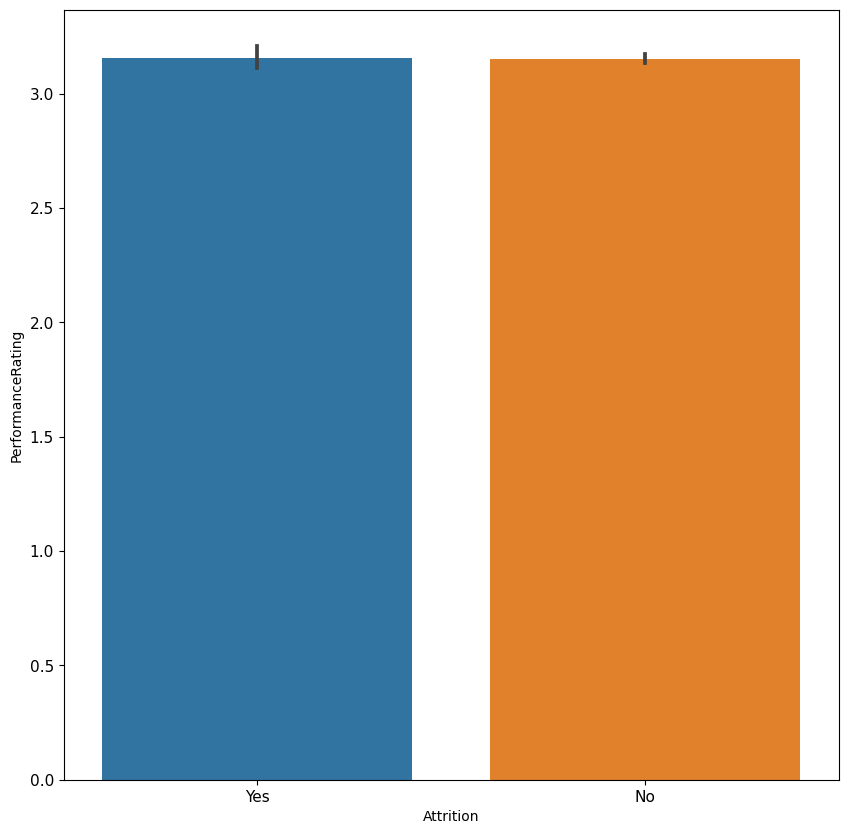

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(x='Attrition',y='PerformanceRating',data=df)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

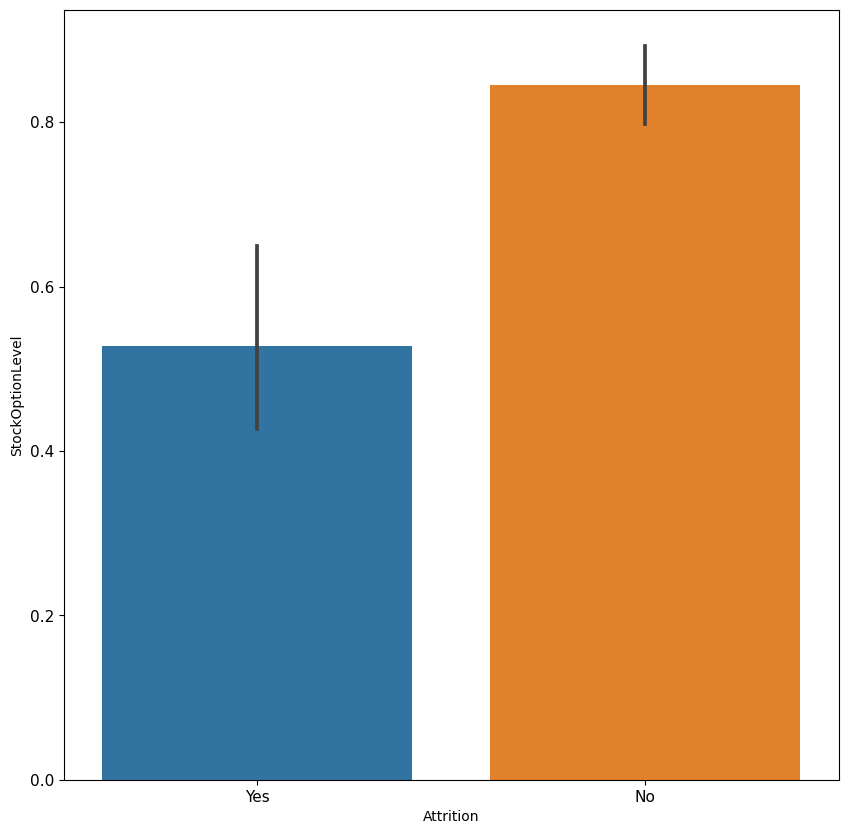

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(x='Attrition',y='StockOptionLevel',data=df)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [68]:
#here we can see that lower stock option tends to have higher attrition rates

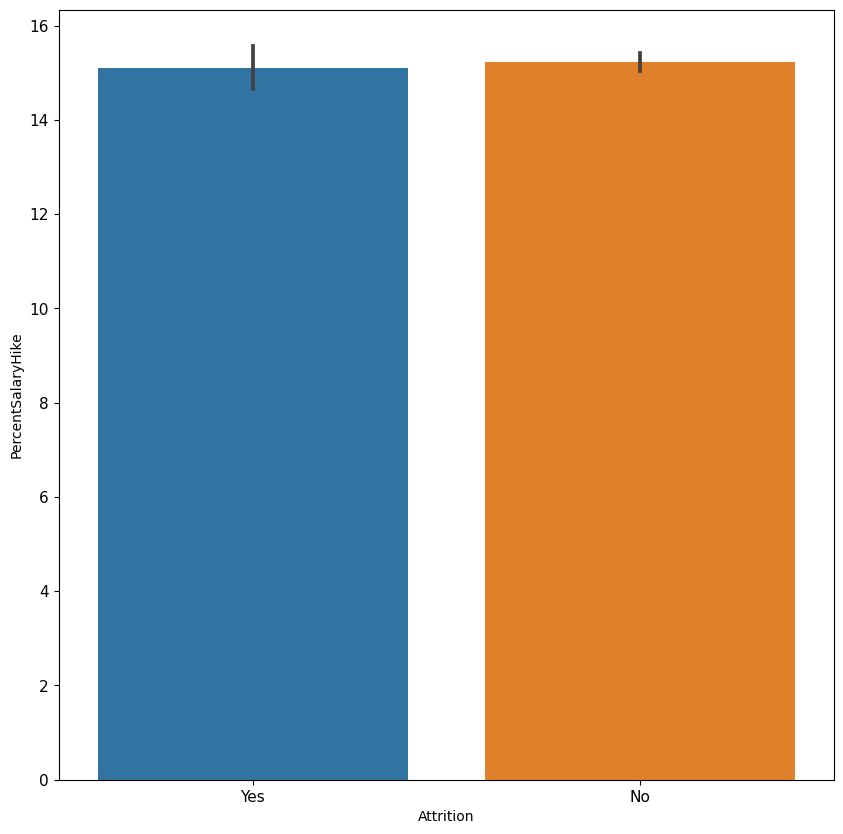

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(x='Attrition',y='PercentSalaryHike',data=df)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [70]:
#Does not provide as with much details

In [71]:
pd.crosstab([df.Attrition,df.JobRole], [df.PercentSalaryHike],margins=True)

PercentSalaryHike                     11   12   13   14   15  16  17  18  19  \
Attrition JobRole                                                              
No        Healthcare Representative   12   16   17   17    9   7   8   6  11   
          Human Resources              9    2    8    2    3   3   2   2   3   
          Laboratory Technician       29   28   32   28   16   7   9  10   9   
          Manager                     19   10   14   17    7   3   1   5   1   
          Manufacturing Director      18   15   18   13   11   7   8  12   6   
          Research Director           13   10    8   14    3   5   7   4   6   
          Research Scientist          23   37   40   33   11  19  20  15  10   
          Sales Executive             39   44   32   48   17  12  11  17  14   
          Sales Representative         7    3    6    5    6   1   2   5   7   
Yes       Healthcare Representative    2    4    0    0    1   0   0   0   1   
          Human Resources              4    2    0    1    3   0   1   0   0   
          Laboratory Technician        9    7   12    6    3   4   4   3   1   
          Manager                      0    2    1    0    1   1   0   0   0   
          Manufacturing Director       3    0    1    1    3   1   0   0   1   
          Research Director            0    2    0    0    0   0   0   0   0   
          Research Scientist           7    5    7    5    2   3   3   1   2   
          Sales Executive             12    8    7    5    3   3   5   7   1   
          Sales Representative         4    3    6    6    2   2   1   2   3   
All                                  210  198  209  201  101  78  82  89  76   

PercentSalaryHike                    20  21  22  23  24  25   All  
Attrition JobRole                                                  
No        Healthcare Representative   7   3   1   4   2   2   122  
          Human Resources             0   4   1   1   0   0    40  
          Laboratory Technician      10   4  10   3   1   1   197  
          Manager                     1   5   6   4   1   3    97  
          Manufacturing Director      8   8   4   2   3   2   135  
          Research Director           1   2   2   0   2   1    78  
          Research Scientist         10   7   8   5   3   4   245  
          Sales Executive             9   8  11   2   2   3   269  
          Sales Representative        2   2   1   1   1   1    50  
Yes       Healthcare Representative   0   0   1   0   0   0     9  
          Human Resources             0   0   1   0   0   0    12  
          Laboratory Technician       4   2   3   1   3   0    62  
          Manager                     0   0   0   0   0   0     5  
          Manufacturing Director      0   0   0   0   0   0    10  
          Research Director           0   0   0   0   0   0     2  
          Research Scientist          2   0   4   3   2   1    47  
          Sales Executive             1   1   2   1   1   0    57  
          Sales Representative        0   2   1   1   0   0    33  
All                                  55  48  56  28  21  18  1470

In [72]:
Work Environment 
-EnvironmentSatisfaction
-JobInvolvement
-WorkLifeBalance
-RelationshipSatisfaction
-OverTime


SyntaxError: invalid syntax (1500060319.py, line 1)

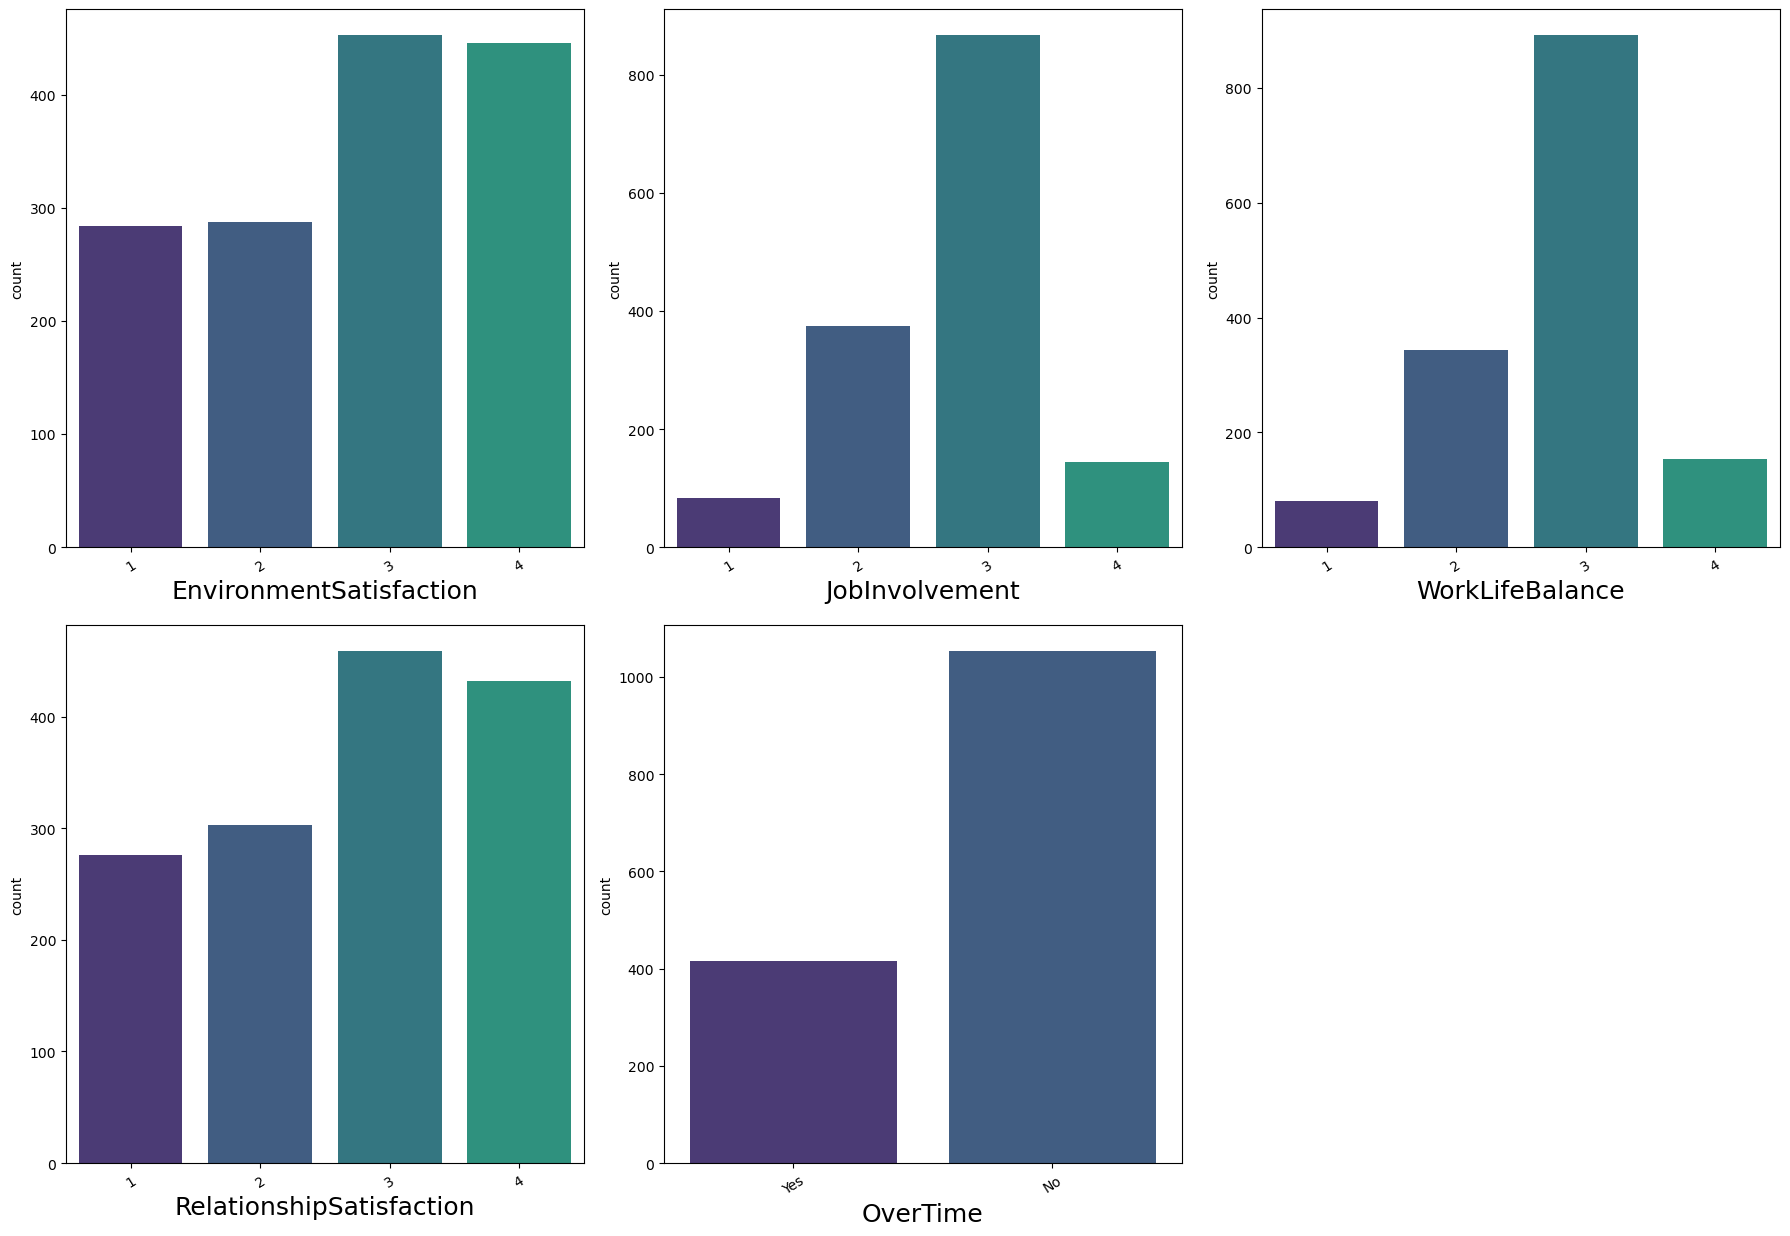

In [75]:
sns.set_palette('viridis')
plt.figure(figsize=(18,18), facecolor='white')
PN = 1
Variable=['EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'RelationshipSatisfaction', 'OverTime']
for v in Variable:
    if PN <=7:
        x = plt.subplot(3,3,PN)
        sns.countplot(x=v, data=df)
        plt.xlabel(v, fontsize=18)
        plt.xticks(rotation=32)
    PN+=1
plt.tight_layout()
plt.show()

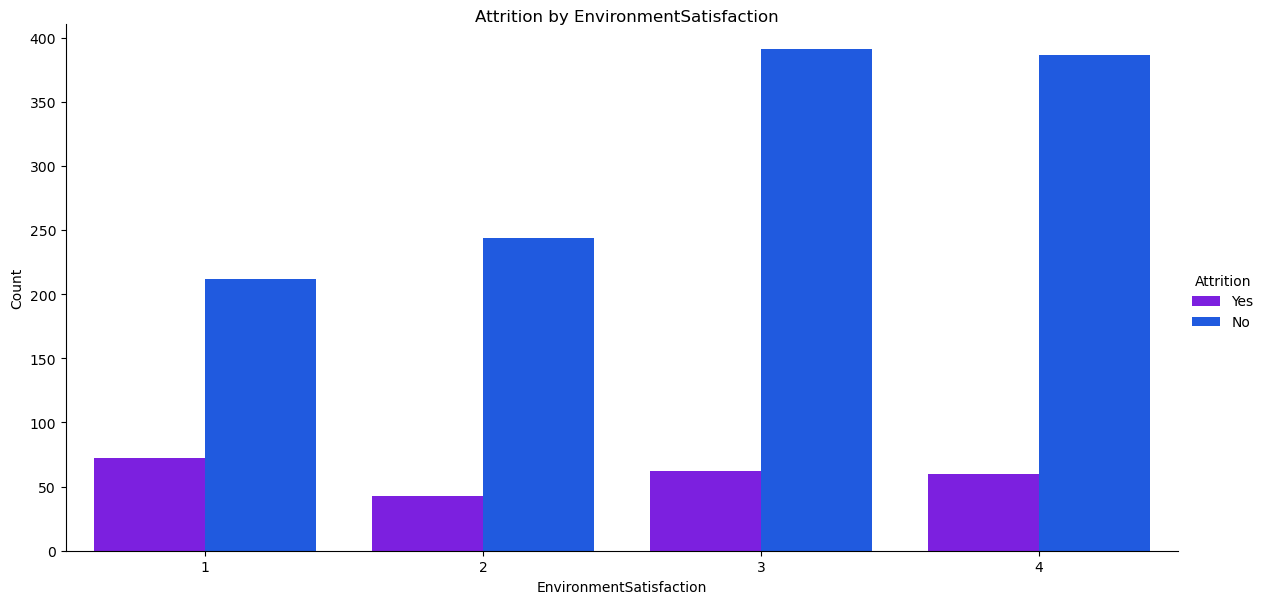

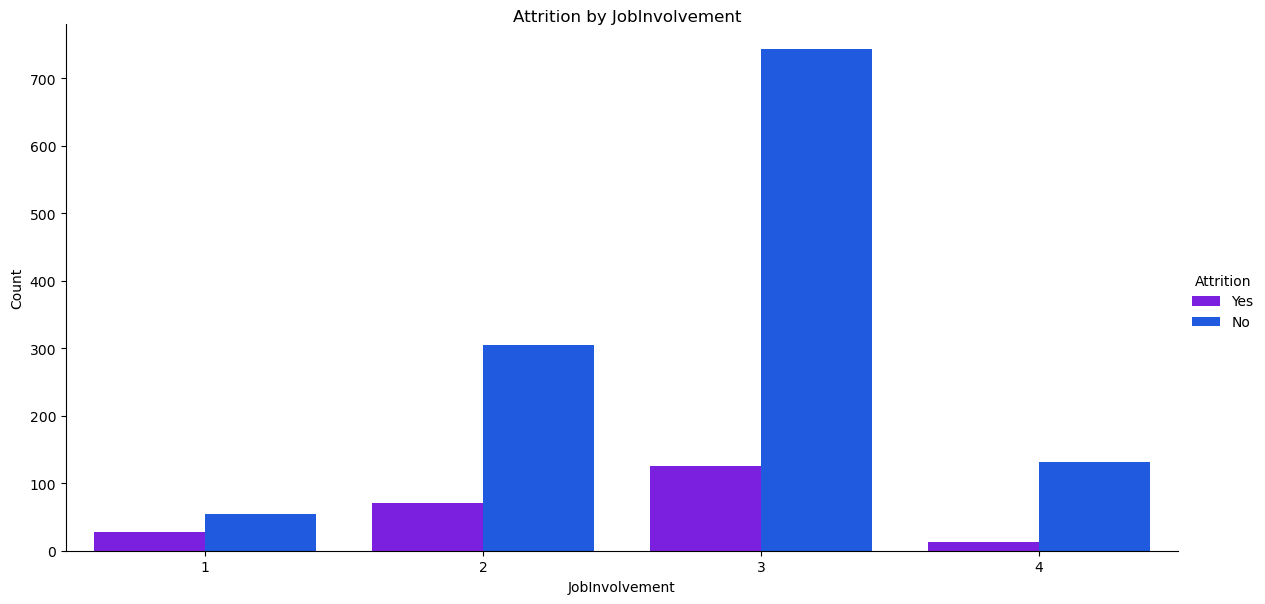

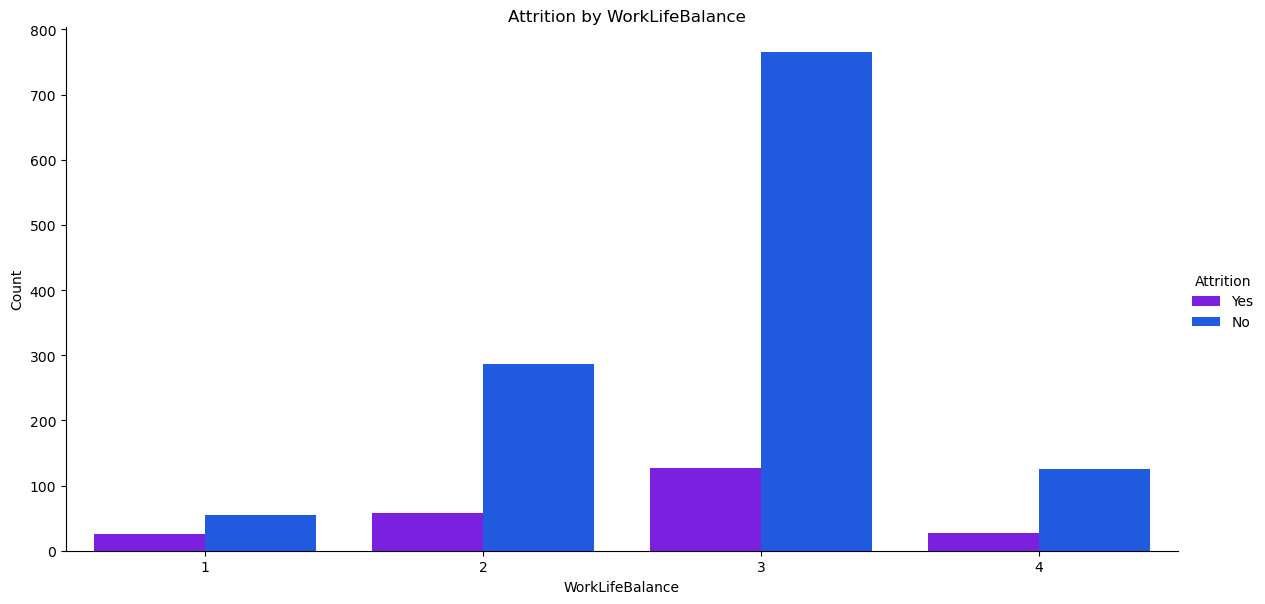

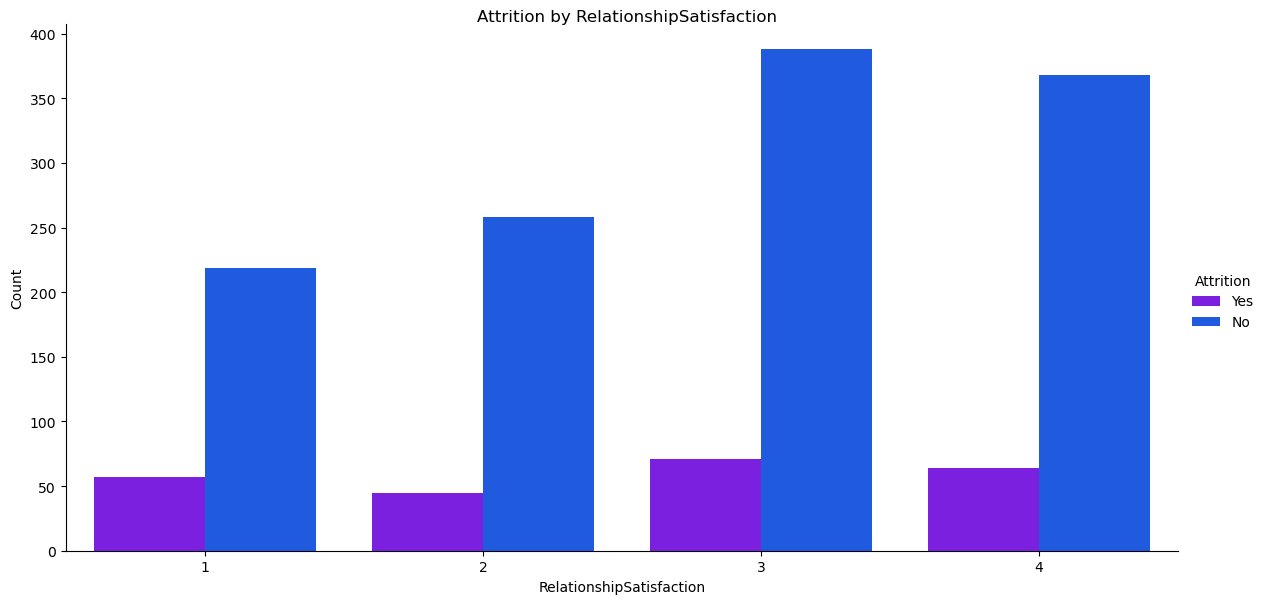

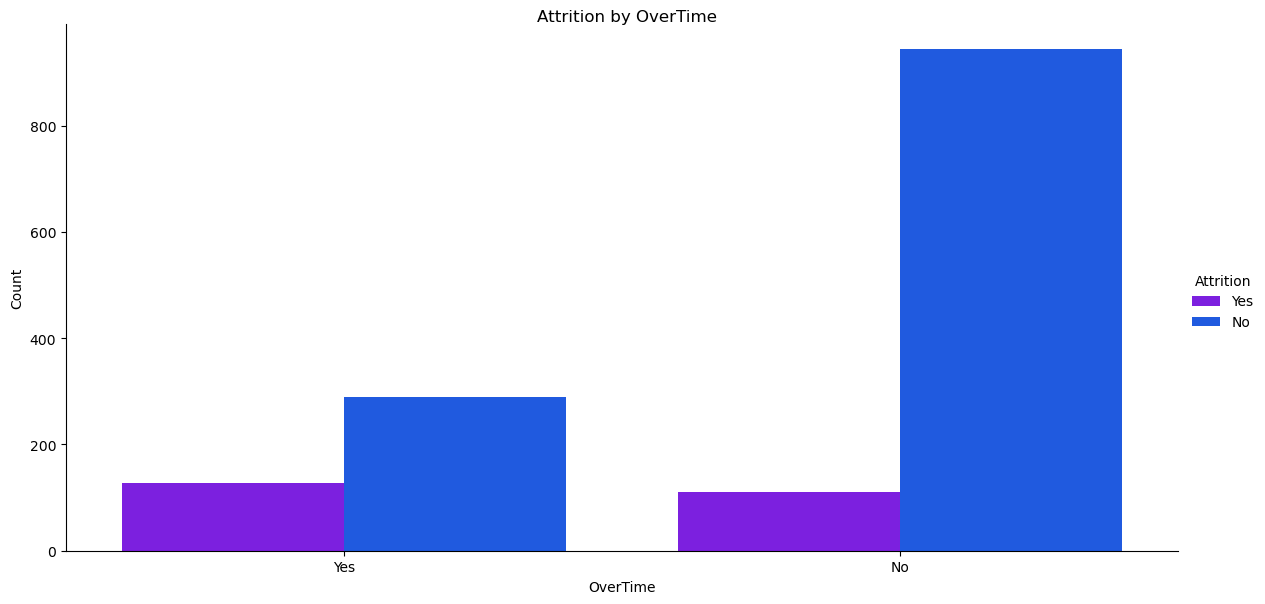

In [76]:
Variable=['EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'RelationshipSatisfaction', 'OverTime']
sns.set_palette('gist_rainbow_r')

for v in Variable:
    r = sns.catplot(x=v, hue='Attrition', kind='count', data=df, height=6, aspect=2)
    r.set_axis_labels(v, 'Count')
    r.fig.suptitle(f'Attrition by {v}', y=1.0) 
plt.show()

In [77]:
#The only interesting element in here is that employees with lower environmental satisfaction tends to gave a higher attrition rate 

In [78]:
pd.crosstab([df.Attrition,df.JobRole], [df.EnvironmentSatisfaction],margins=True)

EnvironmentSatisfaction                1    2    3    4   All
Attrition JobRole                                            
No        Healthcare Representative   18   22   46   36   122
          Human Resources              6    8   19    7    40
          Laboratory Technician       31   41   57   68   197
          Manager                     17   16   32   32    97
          Manufacturing Director      19   22   42   52   135
          Research Director           22   16   20   20    78
          Research Scientist          45   50   72   78   245
          Sales Executive             48   56   85   80   269
          Sales Representative         6   13   18   13    50
Yes       Healthcare Representative    4    2    1    2     9
          Human Resources              4    3    2    3    12
          Laboratory Technician       22    8   18   14    62
          Manager                      3    1    0    1     5
          Manufacturing Director       2    2    4    2    10
          Research Director            0    1    0    1     2
          Research Scientist          14    4   15   14    47
          Sales Executive             18   13   12   14    57
          Sales Representative         5    9   10    9    33
All                                  284  287  453  446  1470

In [79]:
#Seems like Sales executives, research scientist, research director, lab technician arent satisfied with the environment followed by

In [80]:
pd.crosstab([df.Attrition,df.JobRole], [df.OverTime],margins=True)

OverTime                               No  Yes   All
Attrition JobRole                                   
No        Healthcare Representative    87   35   122
          Human Resources              32    8    40
          Laboratory Technician       166   31   197
          Manager                      74   23    97
          Manufacturing Director      100   35   135
          Research Director            56   22    78
          Research Scientist          181   64   245
          Sales Executive             206   63   269
          Sales Representative         42    8    50
Yes       Healthcare Representative     7    2     9
          Human Resources               7    5    12
          Laboratory Technician        31   31    62
          Manager                       1    4     5
          Manufacturing Director        6    4    10
          Research Director             1    1     2
          Research Scientist           14   33    47
          Sales Executive              26   31    57
          Sales Representative         17   16    33
All                                  1054  416  1470

In [81]:
#Overtime might play a role in attrition but does not provide a very clear indication

Career Development
-YearsAtCompany
-YearsInCurrentRole
-YearsSinceLastPromotion
-YearsWithCurrManager
-TotalWorkingYears
-NumCompaniesWorked

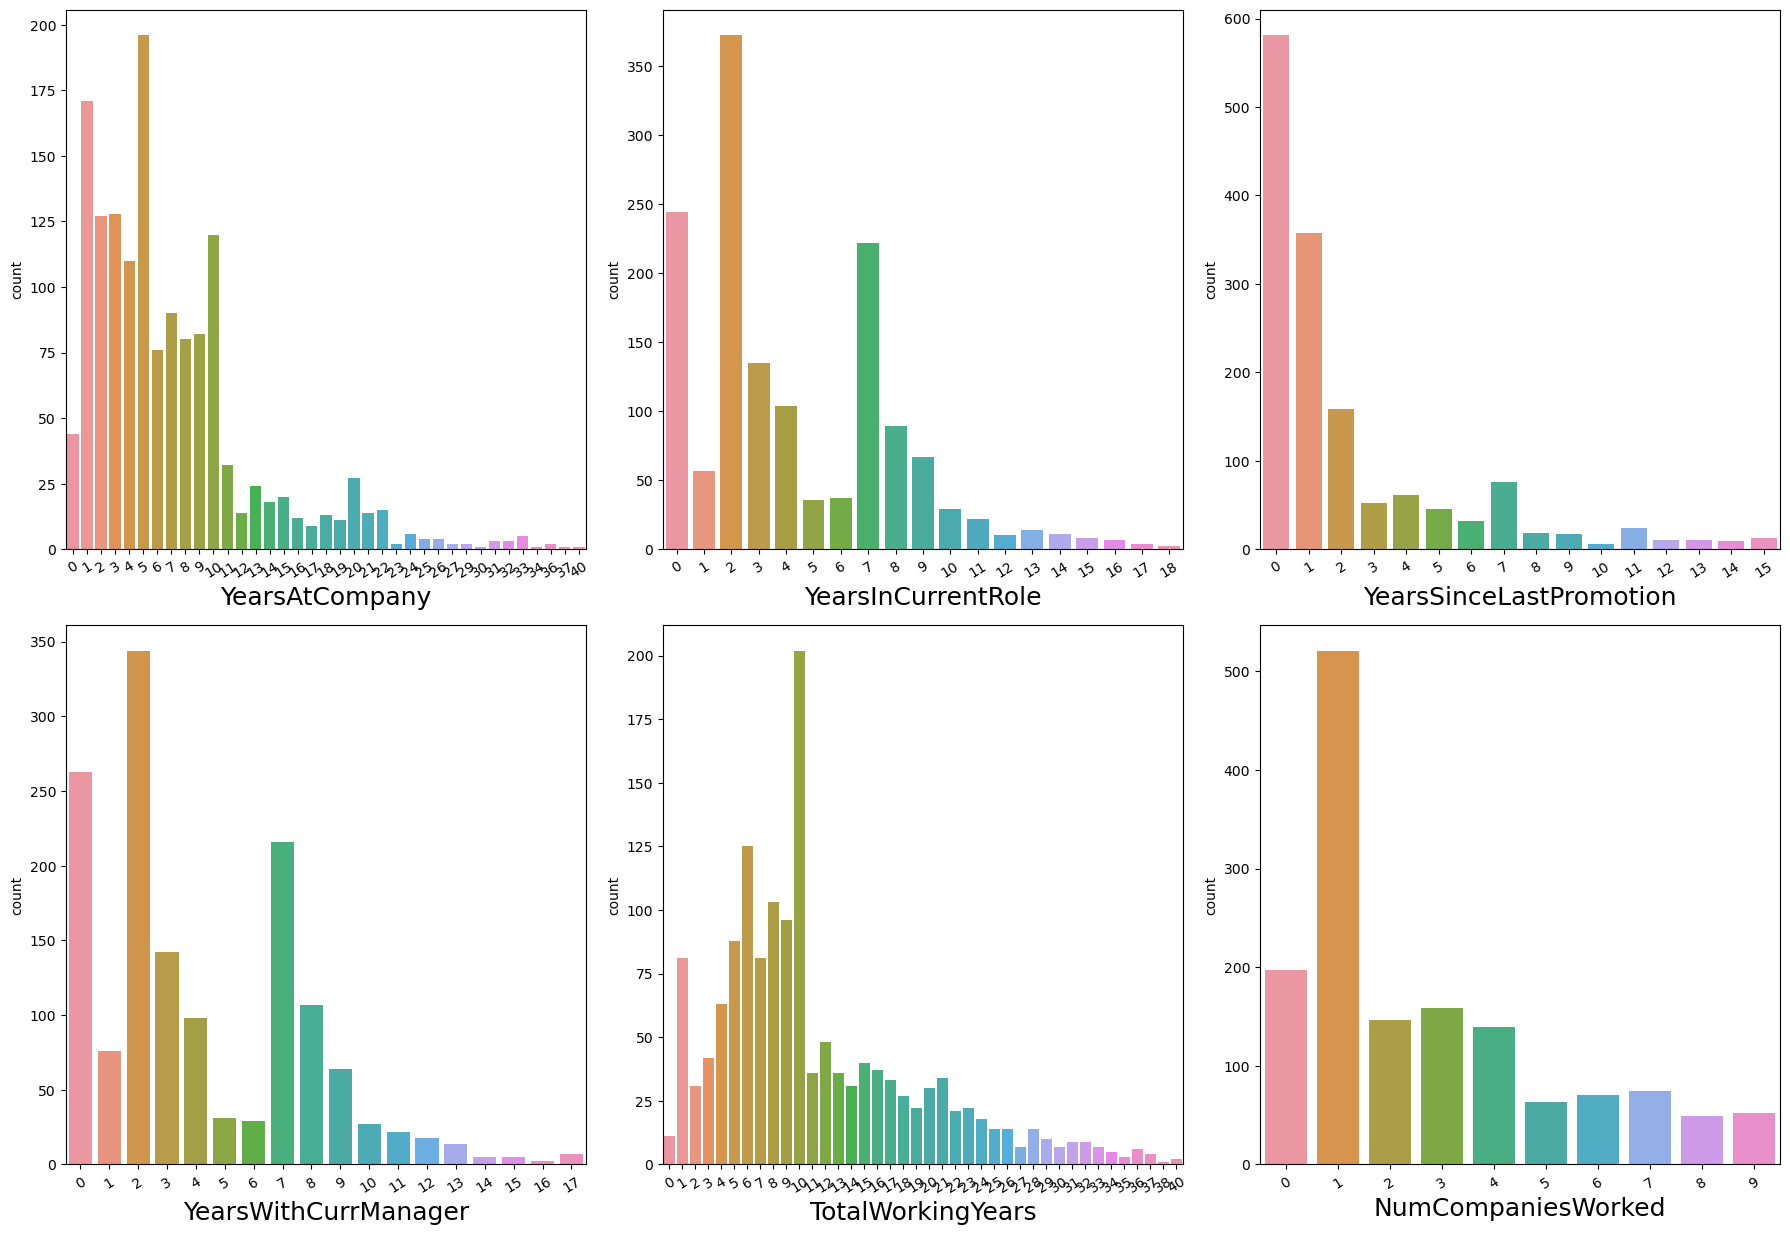

In [82]:
sns.set_palette('viridis')
plt.figure(figsize=(18,18), facecolor='white')
PN = 1
Variable=['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked']
for v in Variable:
    if PN <=7:
        x = plt.subplot(3,3,PN)
        sns.countplot(x=v, data=df)
        plt.xlabel(v, fontsize=18)
        plt.xticks(rotation=32)
    PN+=1
plt.tight_layout()
plt.show()

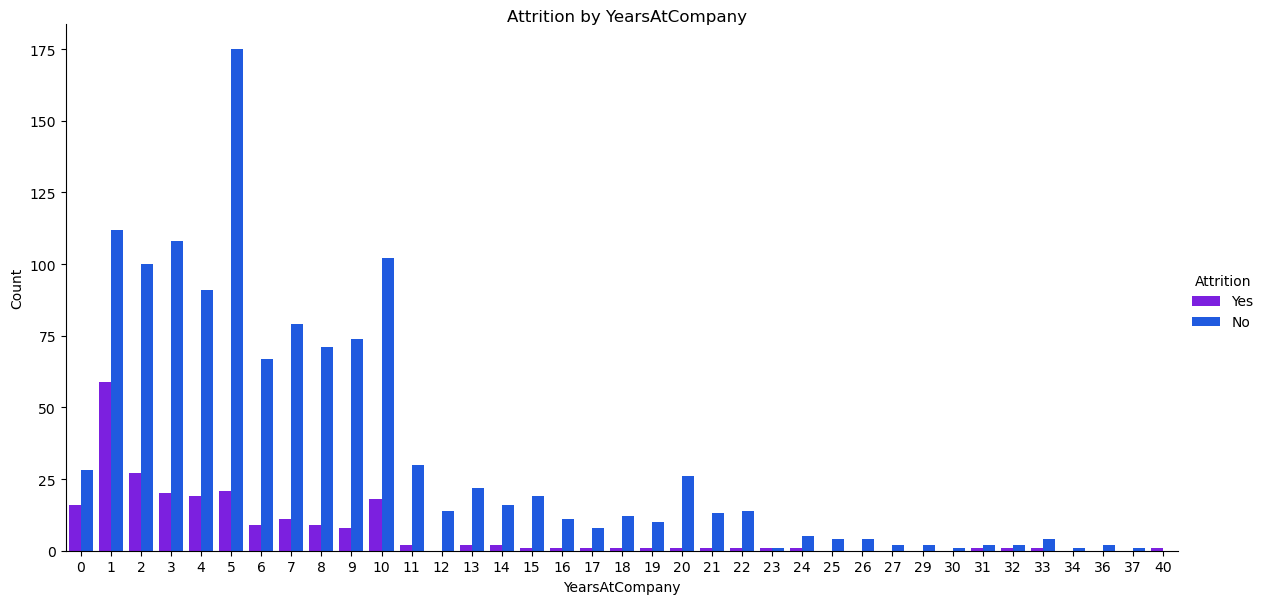

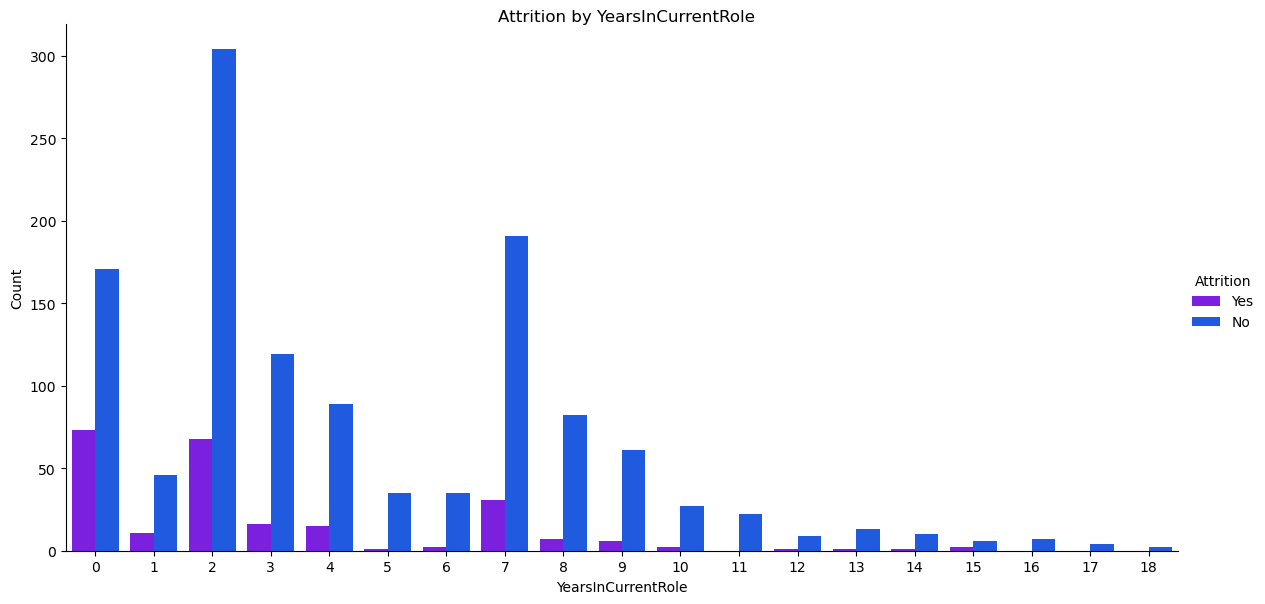

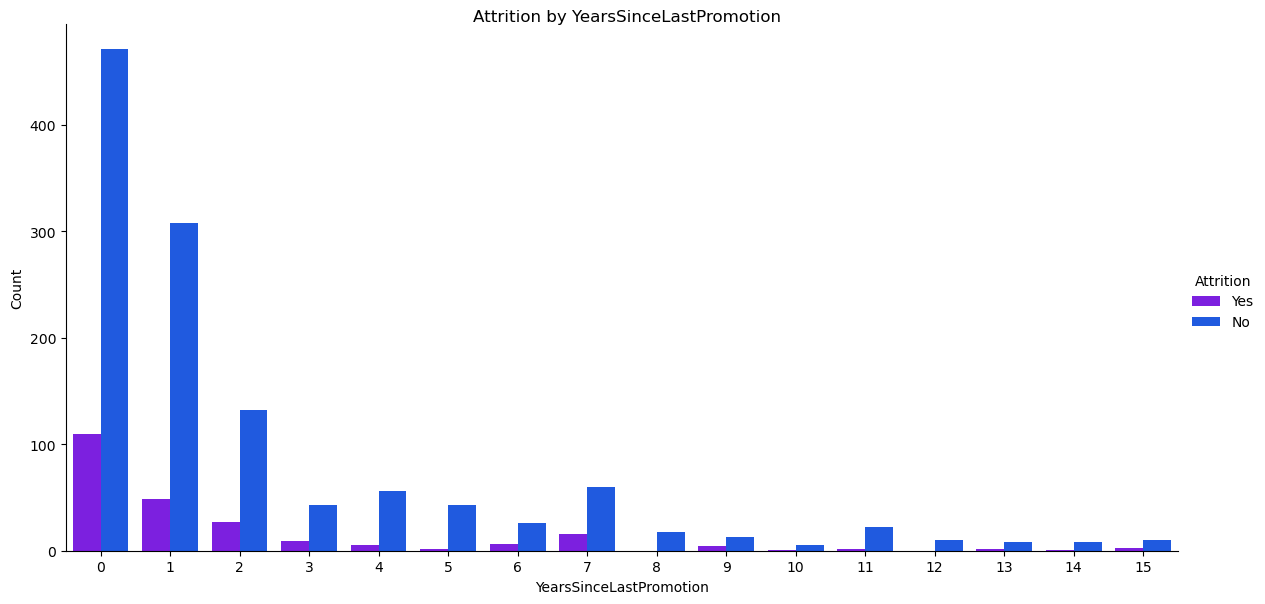

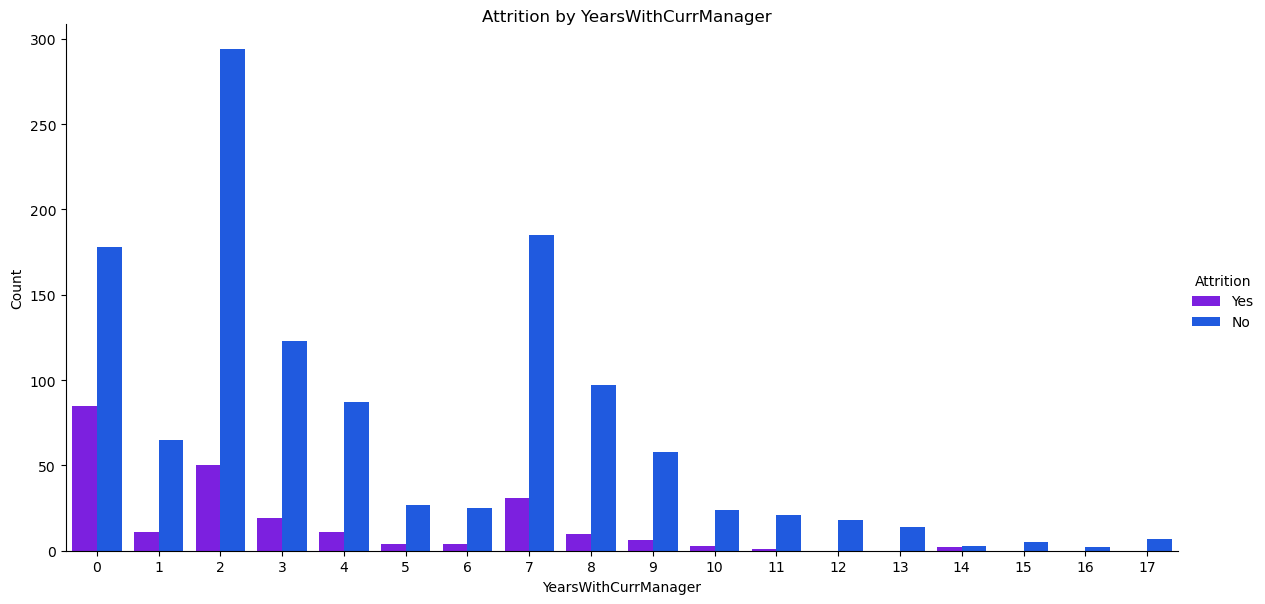

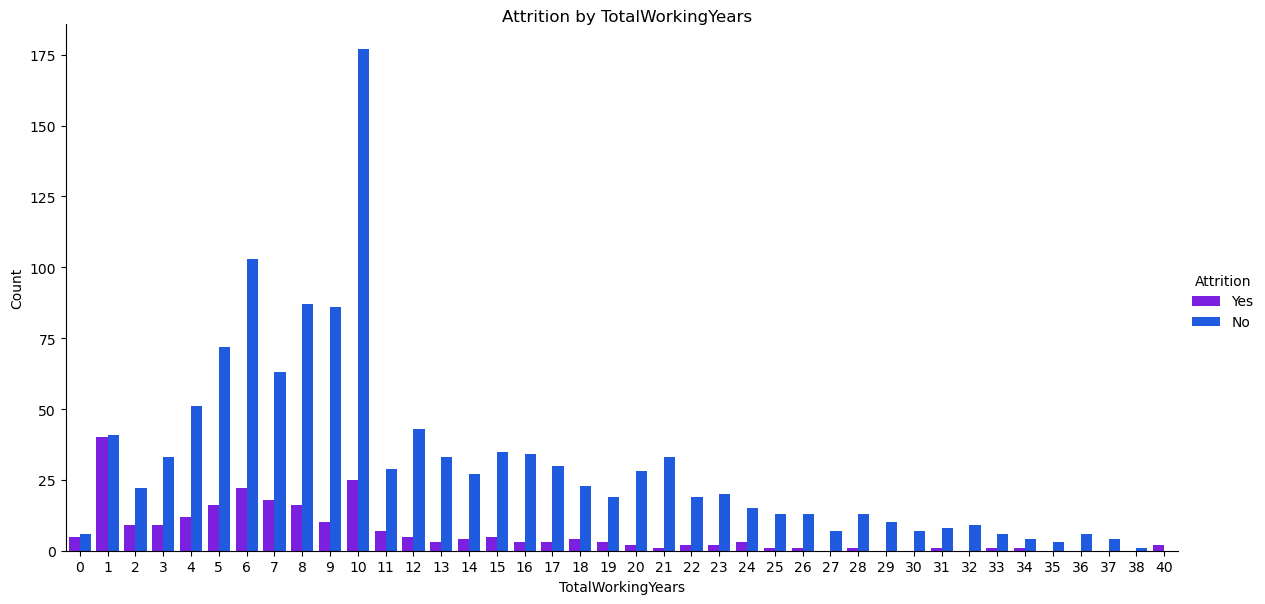

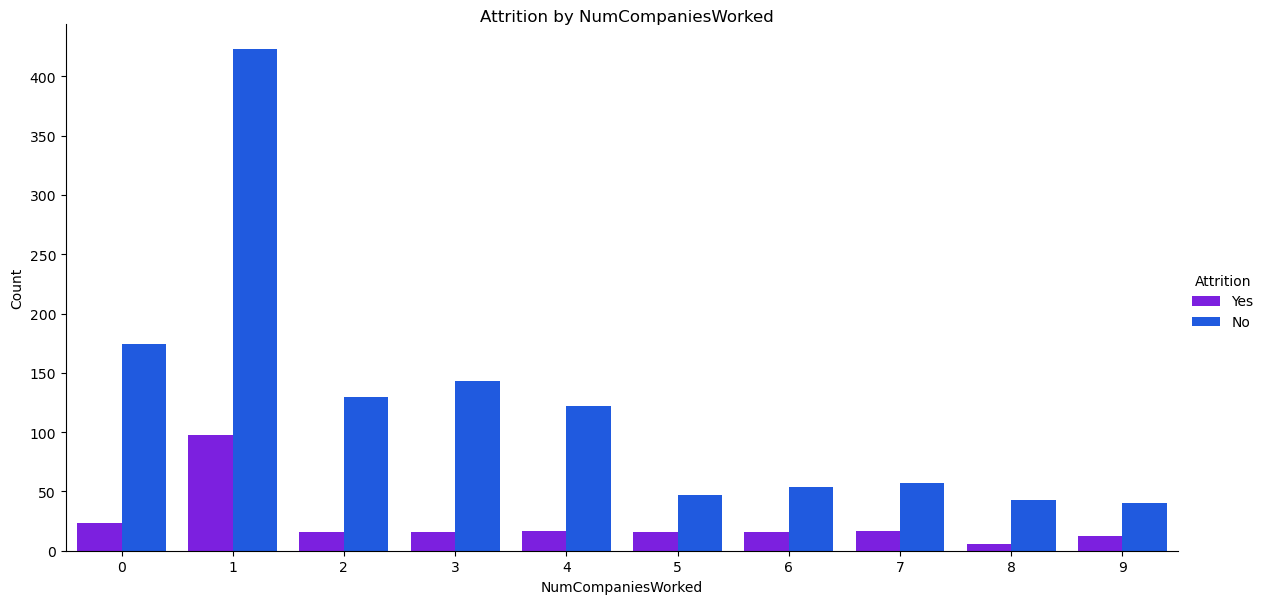

In [83]:
Variable=['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked']
sns.set_palette('gist_rainbow_r')

for v in Variable:
    r = sns.catplot(x=v, hue='Attrition', kind='count', data=df, height=6, aspect=2)
    r.set_axis_labels(v, 'Count')
    r.fig.suptitle(f'Attrition by {v}', y=1.0) 
plt.show()

In [84]:
#Here we can see that attrition tends to be higher if a person works for 1 - 2 years 
#Attrition is higher when an employee spends less than a year or less than 2 years
#Attrition is higher when it has not been a while since the last promotion and it could be that once an employee tends to recieve a promotion he/she might want to work for a different company
#Attrition is higher when an employee does not speak a lot of time with their manager.
#Attrition is higher when an employee have worked for a year

-DistanceFromHome
-EmployeeCount
-EmployeeNumber
-StandardHours

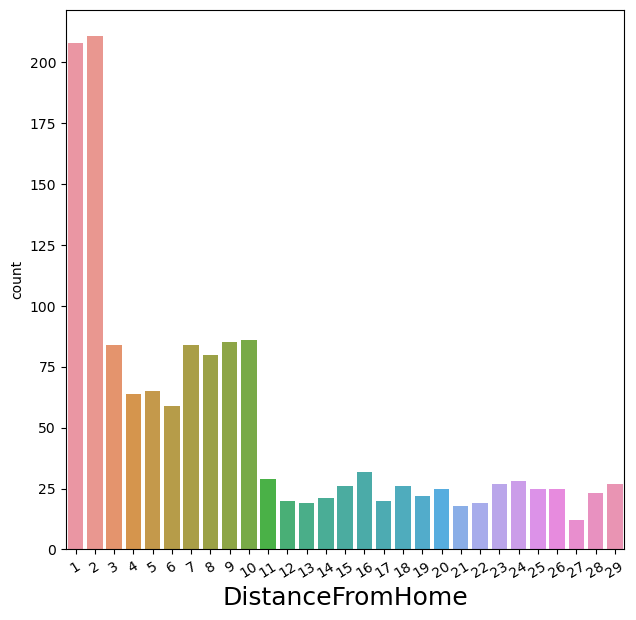

In [85]:
sns.set_palette('viridis')
plt.figure(figsize=(18,18), facecolor='white')
PN = 1
Variable=['DistanceFromHome']
for v in Variable:
    if PN <=3:
        x = plt.subplot(3,3,PN)
        sns.countplot(x=v, data=df)
        plt.xlabel(v, fontsize=18)
        plt.xticks(rotation=32)
    PN+=1
plt.tight_layout()
plt.show()

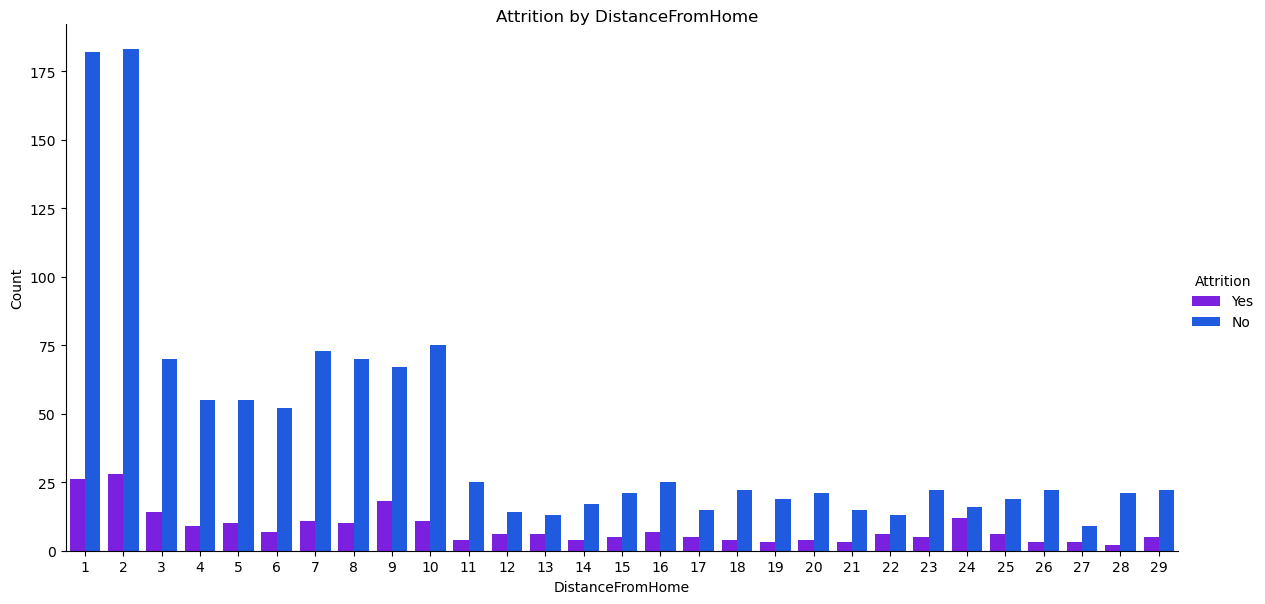

In [86]:
Variable=['DistanceFromHome']
sns.set_palette('gist_rainbow_r')

for v in Variable:
    r = sns.catplot(x=v, hue='Attrition', kind='count', data=df, height=6, aspect=2)
    r.set_axis_labels(v, 'Count')
    r.fig.suptitle(f'Attrition by {v}', y=1.0) 
plt.show()

In [87]:
#Mixed results for distance from home

In [88]:
pd.crosstab([df.Attrition,df.JobRole], [df.DistanceFromHome],margins=True)

DistanceFromHome                       1    2   3   4   5   6   7   8   9  10  \
Attrition JobRole                                                               
No        Healthcare Representative   23   14   4   3   6   4   8   8   5   7   
          Human Resources              8    9   3   2   1   2   0   5   1   2   
          Laboratory Technician       27   25  12   9   7  12  10  10  18   6   
          Manager                     13   22   6   8   6   3   5   3   4   5   
          Manufacturing Director      23   22   4   6   4   5  10   5   5   6   
          Research Director           13   10   6   1   3   4   7   5   2   6   
          Research Scientist          40   32  15   9  14  14  13  10  19  12   
          Sales Executive             33   37  19  14  11   7  16  21  10  26   
          Sales Representative         2   12   1   3   3   1   4   3   3   5   
Yes       Healthcare Representative    0    1   0   0   0   0   0   0   0   0   
          Human Resources              1    1   0   0   0   1   0   1   1   0   
          Laboratory Technician        4   11   3   3   2   3   6   4   4   3   
          Manager                      0    3   0   0   0   0   0   0   0   0   
          Manufacturing Director       1    2   1   0   0   0   1   1   0   2   
          Research Director            0    1   0   0   0   0   0   0   0   0   
          Research Scientist           7    4   5   2   3   1   1   2   2   4   
          Sales Executive              6    2   3   4   2   1   0   2   5   2   
          Sales Representative         7    3   2   0   3   1   3   0   6   0   
All                                  208  211  84  64  65  59  84  80  85  86   

DistanceFromHome                     11  12  13  14  15  16  17  18  19  20  \
Attrition JobRole                                                             
No        Healthcare Representative   4   3   2   1   2   4   1   4   0   4   
          Human Resources             1   0   1   0   0   0   1   0   1   0   
          Laboratory Technician       5   3   2   1   3   5   3   3   6   4   
          Manager                     3   0   1   0   0   1   2   1   0   0   
          Manufacturing Director      3   3   1   0   1   3   2   6   3   2   
          Research Director           1   1   0   3   5   0   1   1   0   0   
          Research Scientist          2   1   2   5   5   4   3   3   6   4   
          Sales Executive             5   3   2   6   5   8   2   4   3   5   
          Sales Representative        1   0   2   1   0   0   0   0   0   2   
Yes       Healthcare Representative   1   0   0   1   1   0   0   0   0   1   
          Human Resources             0   0   1   0   0   0   1   1   0   1   
          Laboratory Technician       0   1   0   2   2   2   2   0   0   0   
          Manager                     0   0   0   0   1   0   0   0   0   0   
          Manufacturing Director      0   0   0   0   0   0   0   0   0   0   
          Research Director           0   1   0   0   0   0   0   0   0   0   
          Research Scientist          1   0   0   1   0   2   2   2   1   0   
          Sales Executive             2   2   5   0   1   3   0   1   1   1   
          Sales Representative        0   2   0   0   0   0   0   0   1   1   
All                                  29  20  19  21  26  32  20  26  22  25   

DistanceFromHome                     21  22  23  24  25  26  27  28  29   All  
Attrition JobRole                                                              
No        Healthcare Representative   1   0   2   3   4   1   2   1   1   122  
          Human Resources             0   0   0   1   1   1   0   0   0    40  
          Laboratory Technician       3   1   5   5   2   0   1   3   6   197  
          Manager                     1   3   0   0   1   6   0   0   3    97  
          Manufacturing Director      2   1   2   3   4   0   3   2   4   135  
          Research Director           0   2   2   0   1   1   0   3   0    78 

#Spliting variables into numeric & category for further testing (Skewness, outliers, encoding etc)

In [89]:
All_Num=['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsSinceLastPromotion','PercentSalaryHike', 
             'YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'PerformanceRating', 'StockOptionLevel']

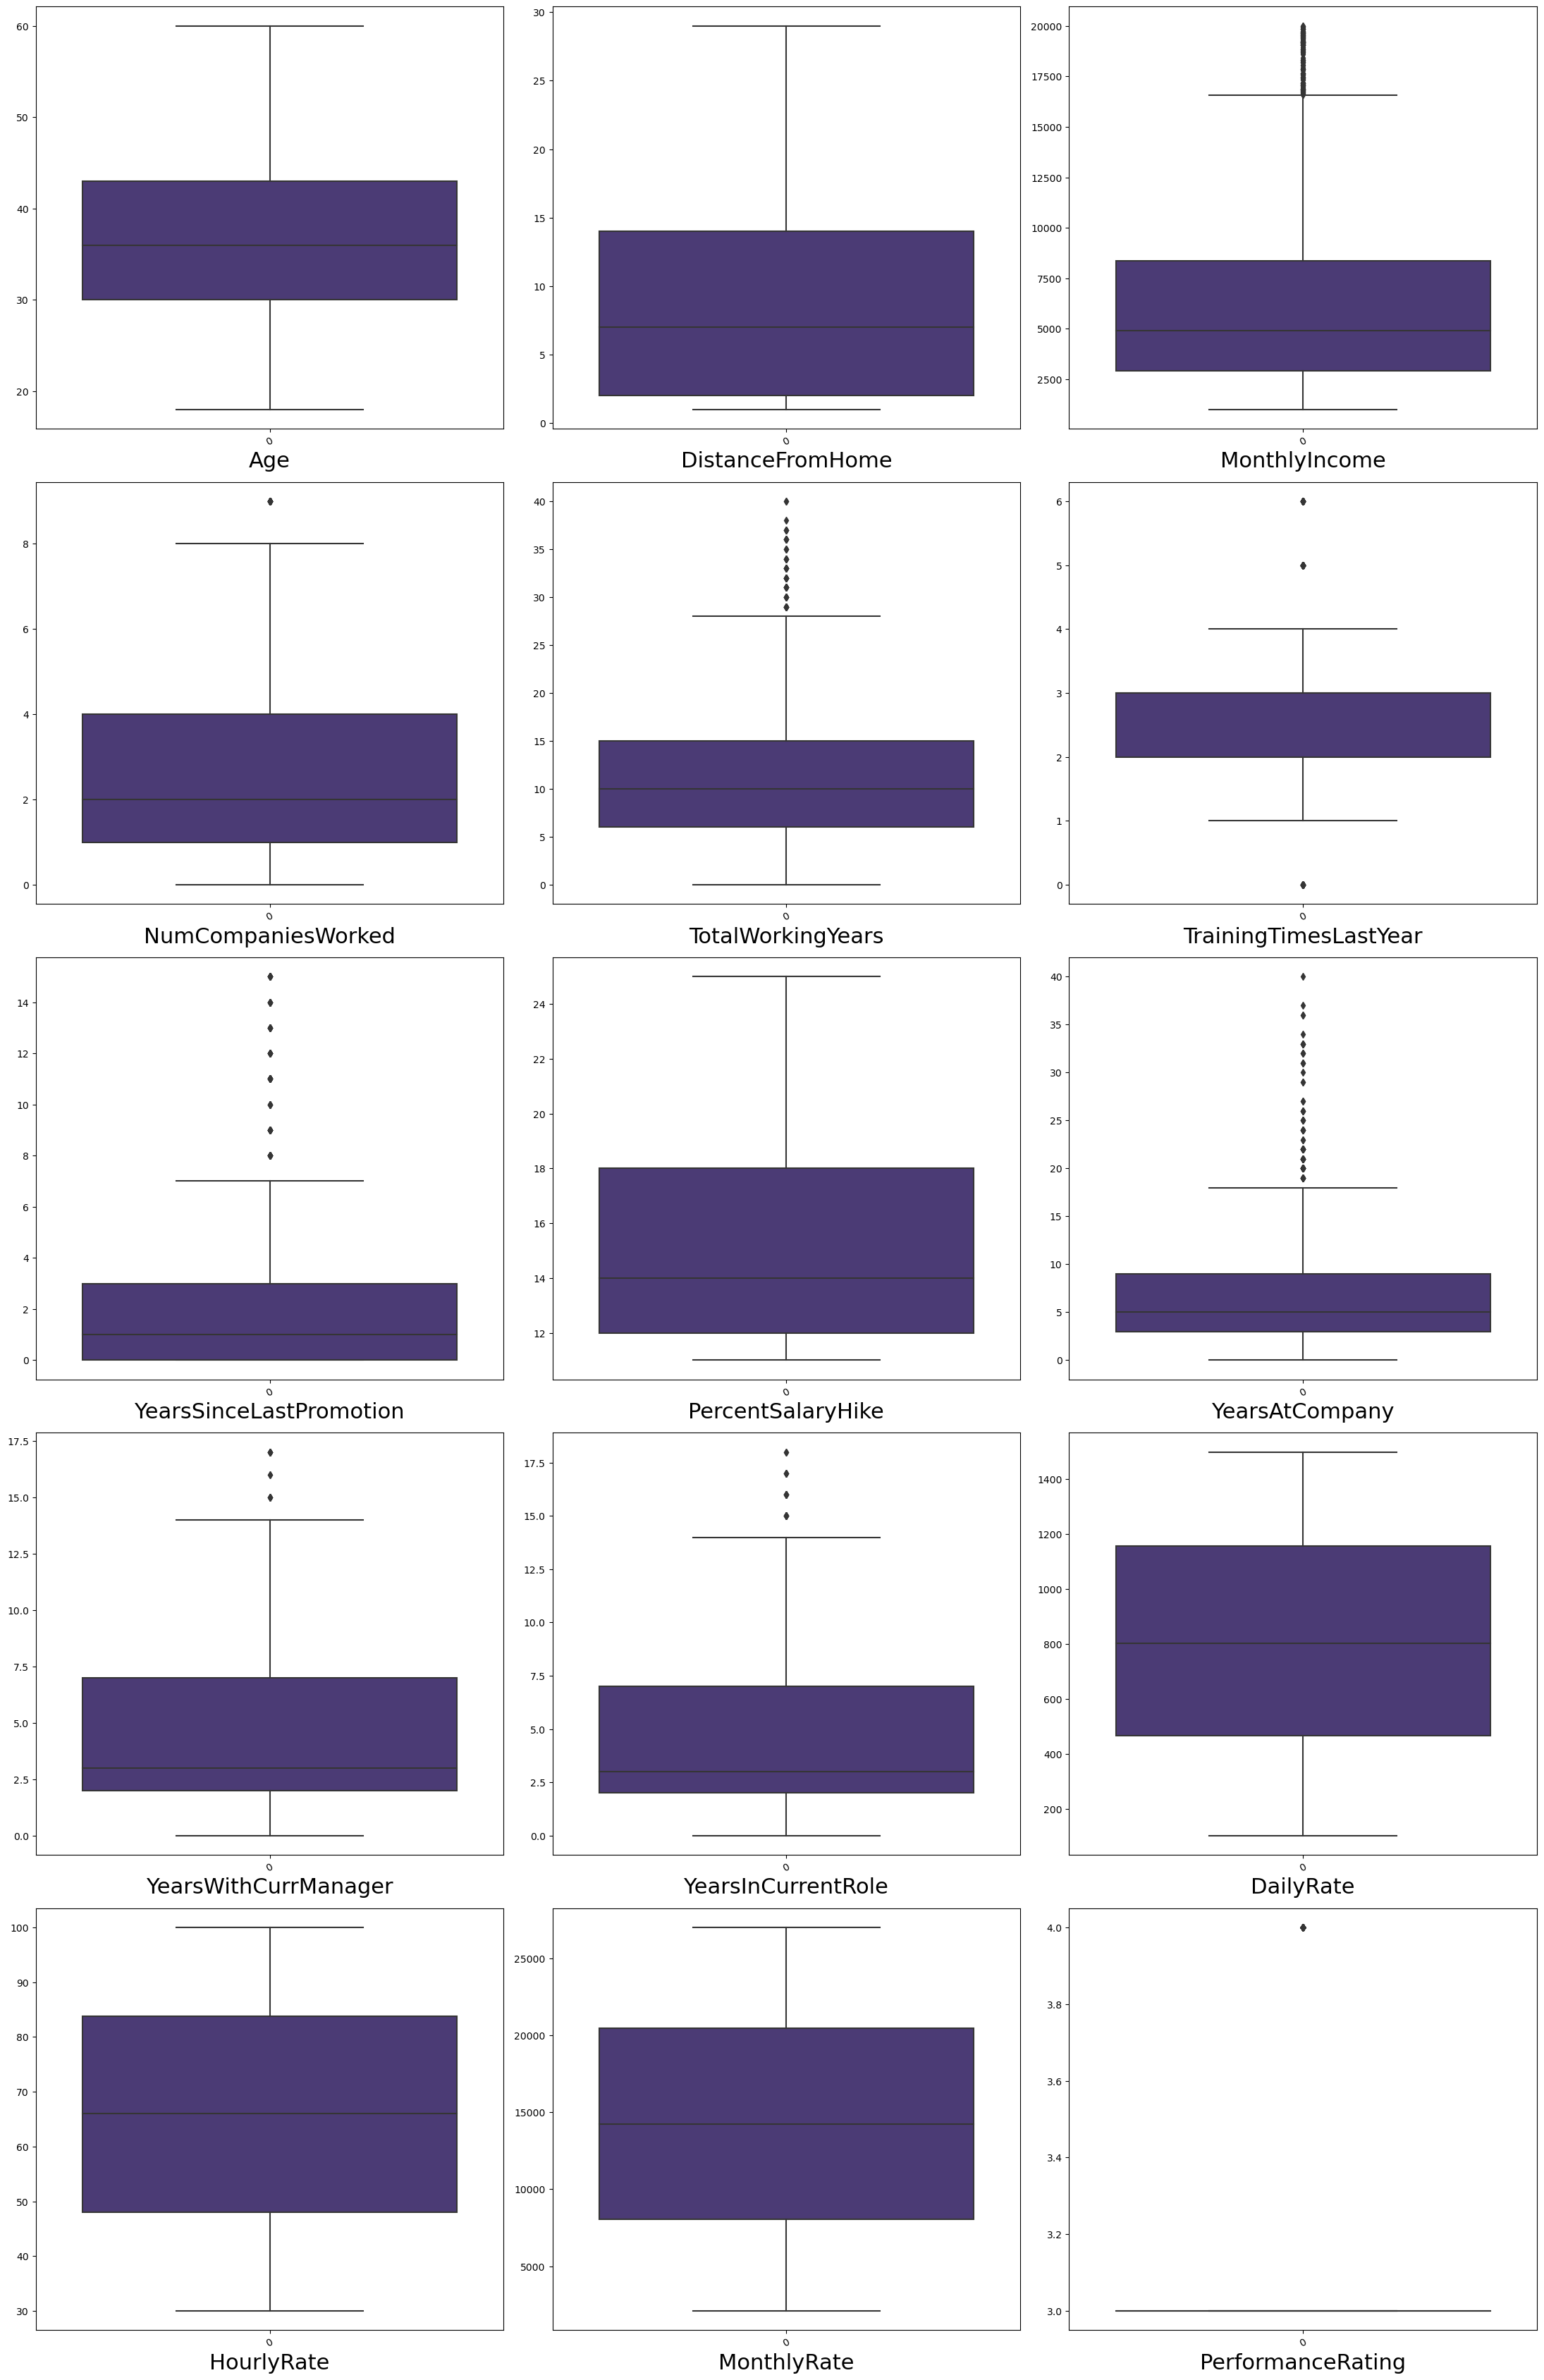

In [90]:
sns.set_palette('viridis')
plt.figure(figsize=(22,40), facecolor='white')
pn =1
for n in All_Num:
    if pn <=15:
        x = plt.subplot(6,3,pn)
        sns.boxplot(df[n])
        plt.xlabel(n,fontsize=22)
        plt.xticks(rotation=28)
    pn+=1
plt.tight_layout()
plt.show()

Insights:
Employees saw a hike of almost 12 to 15%
It is important to note that training is provided to employees for atleast 2 times.
As shown above, people spend 2-10 years 
There are some outliers present for monthly income, total working years, years at company, numcompaniesworked, trainingtimes, performance rating, StockOptionLevel, yearsincurrentrole, yearssincelastpromotion, yearswithcurrmanager"

In [91]:
#Removing variables which are not needed

In [92]:
df.drop(["Over18","EmployeeNumber","EmployeeCount", "StandardHours"], axis=1, inplace=True)

In [93]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeSplit
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,High
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,High
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Low
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,Low
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,Low
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,Very High
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,High
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,High


In [94]:
df.drop(['IncomeSplit'], axis=1, inplace=True)

In [95]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [96]:
from sklearn.preprocessing import OrdinalEncoder

In [97]:
OE = OrdinalEncoder()
def encode(df, Col):
    df[Col] = OE.fit_transform(df[Col])
    return df

OE_Col = ['OverTime','BusinessTravel', 'EducationField','Gender', 'Department', 'MaritalStatus','JobRole','Attrition']
df=encode(df, OE_Col)

In [98]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,1.0,20,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,14,3,4,0,17,3,2,9,6,0,8


In [99]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,0.0,2.0,468,1.0,28,4,3.0,4,0.0,73,2,1,6.0,1,2.0,3785,8489,1,0.0,14,3,2,0,5,3,1,5,4,0,4
1461,50,1.0,2.0,410,2.0,28,3,2.0,4,1.0,39,2,3,7.0,1,0.0,10854,16586,4,1.0,13,3,2,1,20,3,3,3,2,2,0
1462,39,0.0,2.0,722,2.0,24,1,2.0,2,0.0,60,2,4,7.0,4,1.0,12031,8828,0,0.0,11,3,1,1,21,2,2,20,9,9,6
1463,31,0.0,0.0,325,1.0,5,3,3.0,2,1.0,74,3,2,4.0,1,2.0,9936,3787,0,0.0,19,3,2,0,10,2,3,9,4,1,7
1464,26,0.0,2.0,1167,2.0,5,3,4.0,4,0.0,30,2,1,8.0,3,2.0,2966,21378,0,0.0,18,3,4,0,5,2,3,4,2,0,0
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,1.0,20,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,14,3,4,0,17,3,2,9,6,0,8
1469,34,0.0,2.0,628,1.0,8,3,3.0,2,1.0,82,4,2,2.0,3,1.0,4404,10228,2,0.0,12,3,1,0,6,3,4,4,3,1,2


In [100]:
from scipy.stats import zscore

In [101]:
z = np.abs(zscore(df))

In [102]:
threshold = 3
df_new=df[(z<3).all(axis=1)]

In [103]:
print("Shape of original dataframe:", df.shape)
print("New Shape:", df_new.shape)
print("Overall Data Loss:",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Shape of original dataframe: (1470, 31)
New Shape: (1387, 31)
Overall Data Loss: 5.646258503401361


In [104]:
#Data loss is not too much!

In [105]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [106]:
#Skewness seems to be okay although it is slighly higher and this can be dealt with using the right transformation technique.

In [107]:
A = df_new.drop(['Attrition'], axis=1)
B = df_new['Attrition']

In [110]:
from sklearn.preprocessing import power_transform

In [111]:
df1 = power_transform(A)
df1 = pd.DataFrame(df_new, columns=A.columns)
df1.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

In [123]:
positive_skewness = ['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'NumCompaniesWorked','OverTime','YearsSinceLastPromotion', 'PerformanceRating', 'PercentSalaryHike', 'JobLevel', 'DistanceFromHome']
for c in positive_skewness:
    if df1[c].min() > 0: 
        df1[c + '_log'] = np.log(df1[c])


In [124]:
df1.skew()

Age                        -0.331372
BusinessTravel             -1.244082
DailyRate                  -0.001939
Department                  0.327990
DistanceFromHome           -1.055739
Education                  -0.897690
EducationField              1.248908
EnvironmentSatisfaction    -0.093277
Gender                     -0.417296
HourlyRate                  0.043326
JobInvolvement              0.418212
JobLevel                   -0.106528
JobRole                    -0.267531
JobSatisfaction            -0.112993
MaritalStatus              -0.113998
MonthlyIncome               0.003591
MonthlyRate                 0.006710
NumCompaniesWorked         -0.738159
OverTime                    0.954751
PercentSalaryHike          -1.245639
PerformanceRating           1.931566
RelationshipSatisfaction   -0.073337
StockOptionLevel            0.168264
TotalWorkingYears          -0.622987
TrainingTimesLastYear       0.257989
WorkLifeBalance             0.464344
YearsAtCompany             -1.511495
Y

In [125]:
negative_skewness = ['BusinessTravel', 'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsAtCompany','PercentSalaryHike','NumCompaniesWorked']
for c in negative_skewness:
    if df1[c].min() >= 0:
        df1[c + '_squared'] = df1[c] ** 2

In [126]:
df1.skew()

Age                        -0.331372
BusinessTravel             -1.244082
DailyRate                  -0.001939
Department                  0.327990
DistanceFromHome           -1.055739
Education                  -0.897690
EducationField              1.248908
EnvironmentSatisfaction    -0.093277
Gender                     -0.417296
HourlyRate                  0.043326
JobInvolvement              0.418212
JobLevel                   -0.106528
JobRole                    -0.267531
JobSatisfaction            -0.112993
MaritalStatus              -0.113998
MonthlyIncome               0.003591
MonthlyRate                 0.006710
NumCompaniesWorked         -0.738159
OverTime                    0.954751
PercentSalaryHike          -1.245639
PerformanceRating           1.931566
RelationshipSatisfaction   -0.073337
StockOptionLevel            0.168264
TotalWorkingYears          -0.622987
TrainingTimesLastYear       0.257989
WorkLifeBalance             0.464344
YearsAtCompany             -1.511495
Y

In [ ]:
#For categorical variable, it does not matter but for numeric, I think this should be okay

In [129]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_log
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.494310
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.198210
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.029811
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.012503
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.124974
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.005683
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.121069
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,-0.039934
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.015635
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,-0.044163


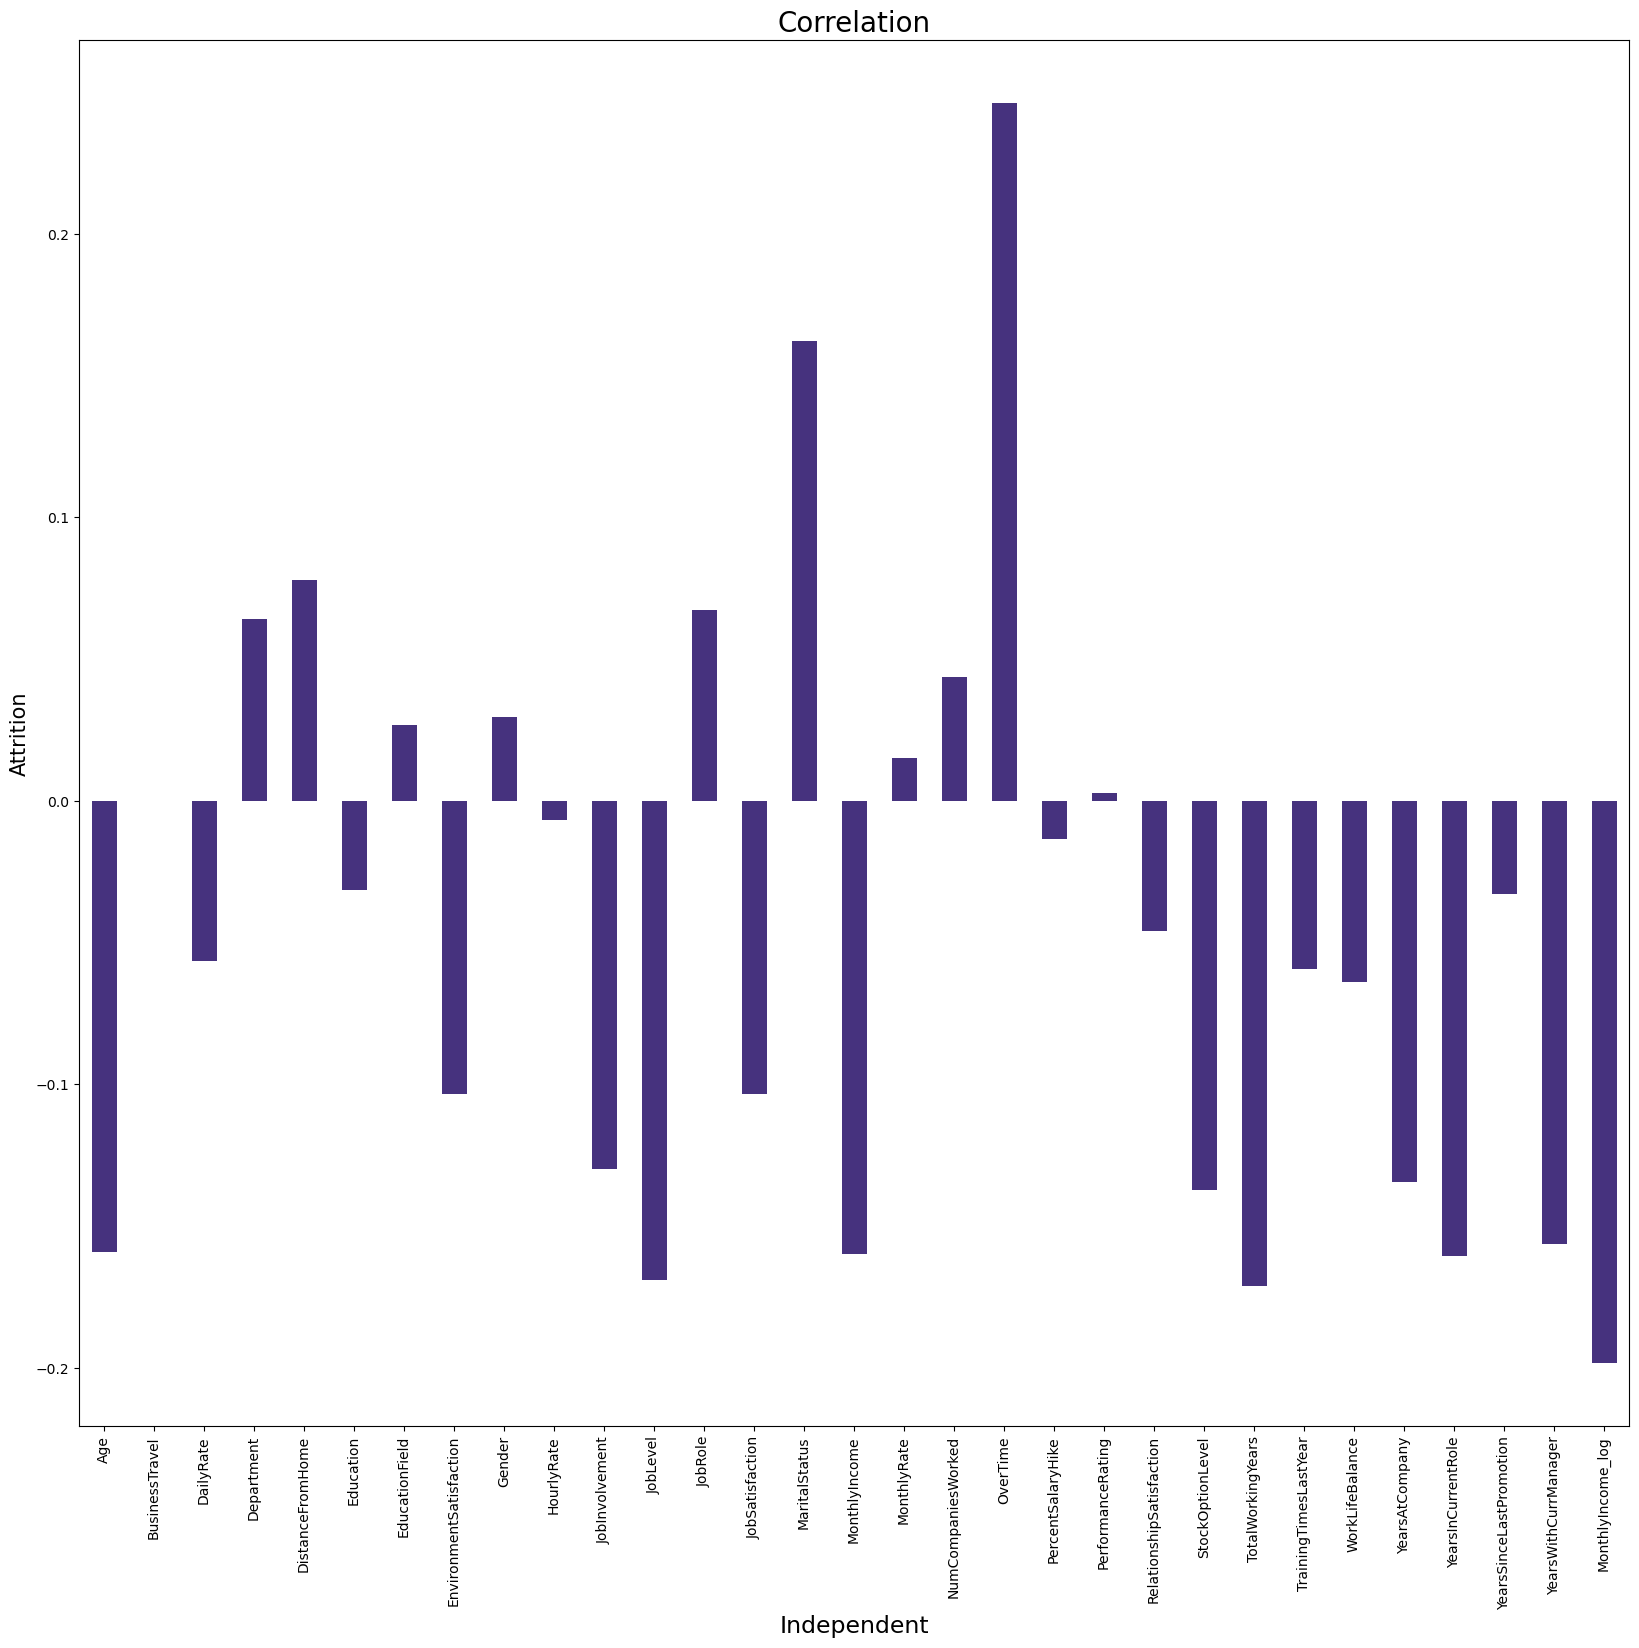

In [130]:
plt.figure(figsize = (20,18))
df.corr()['Attrition'].drop(['Attrition']).plot(kind='bar')
plt.xlabel('Independent',fontsize=17)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation',fontsize = 20)
plt.show()

We can see that Age, Job Level, Month income, total working hours are highly correlated with attrition

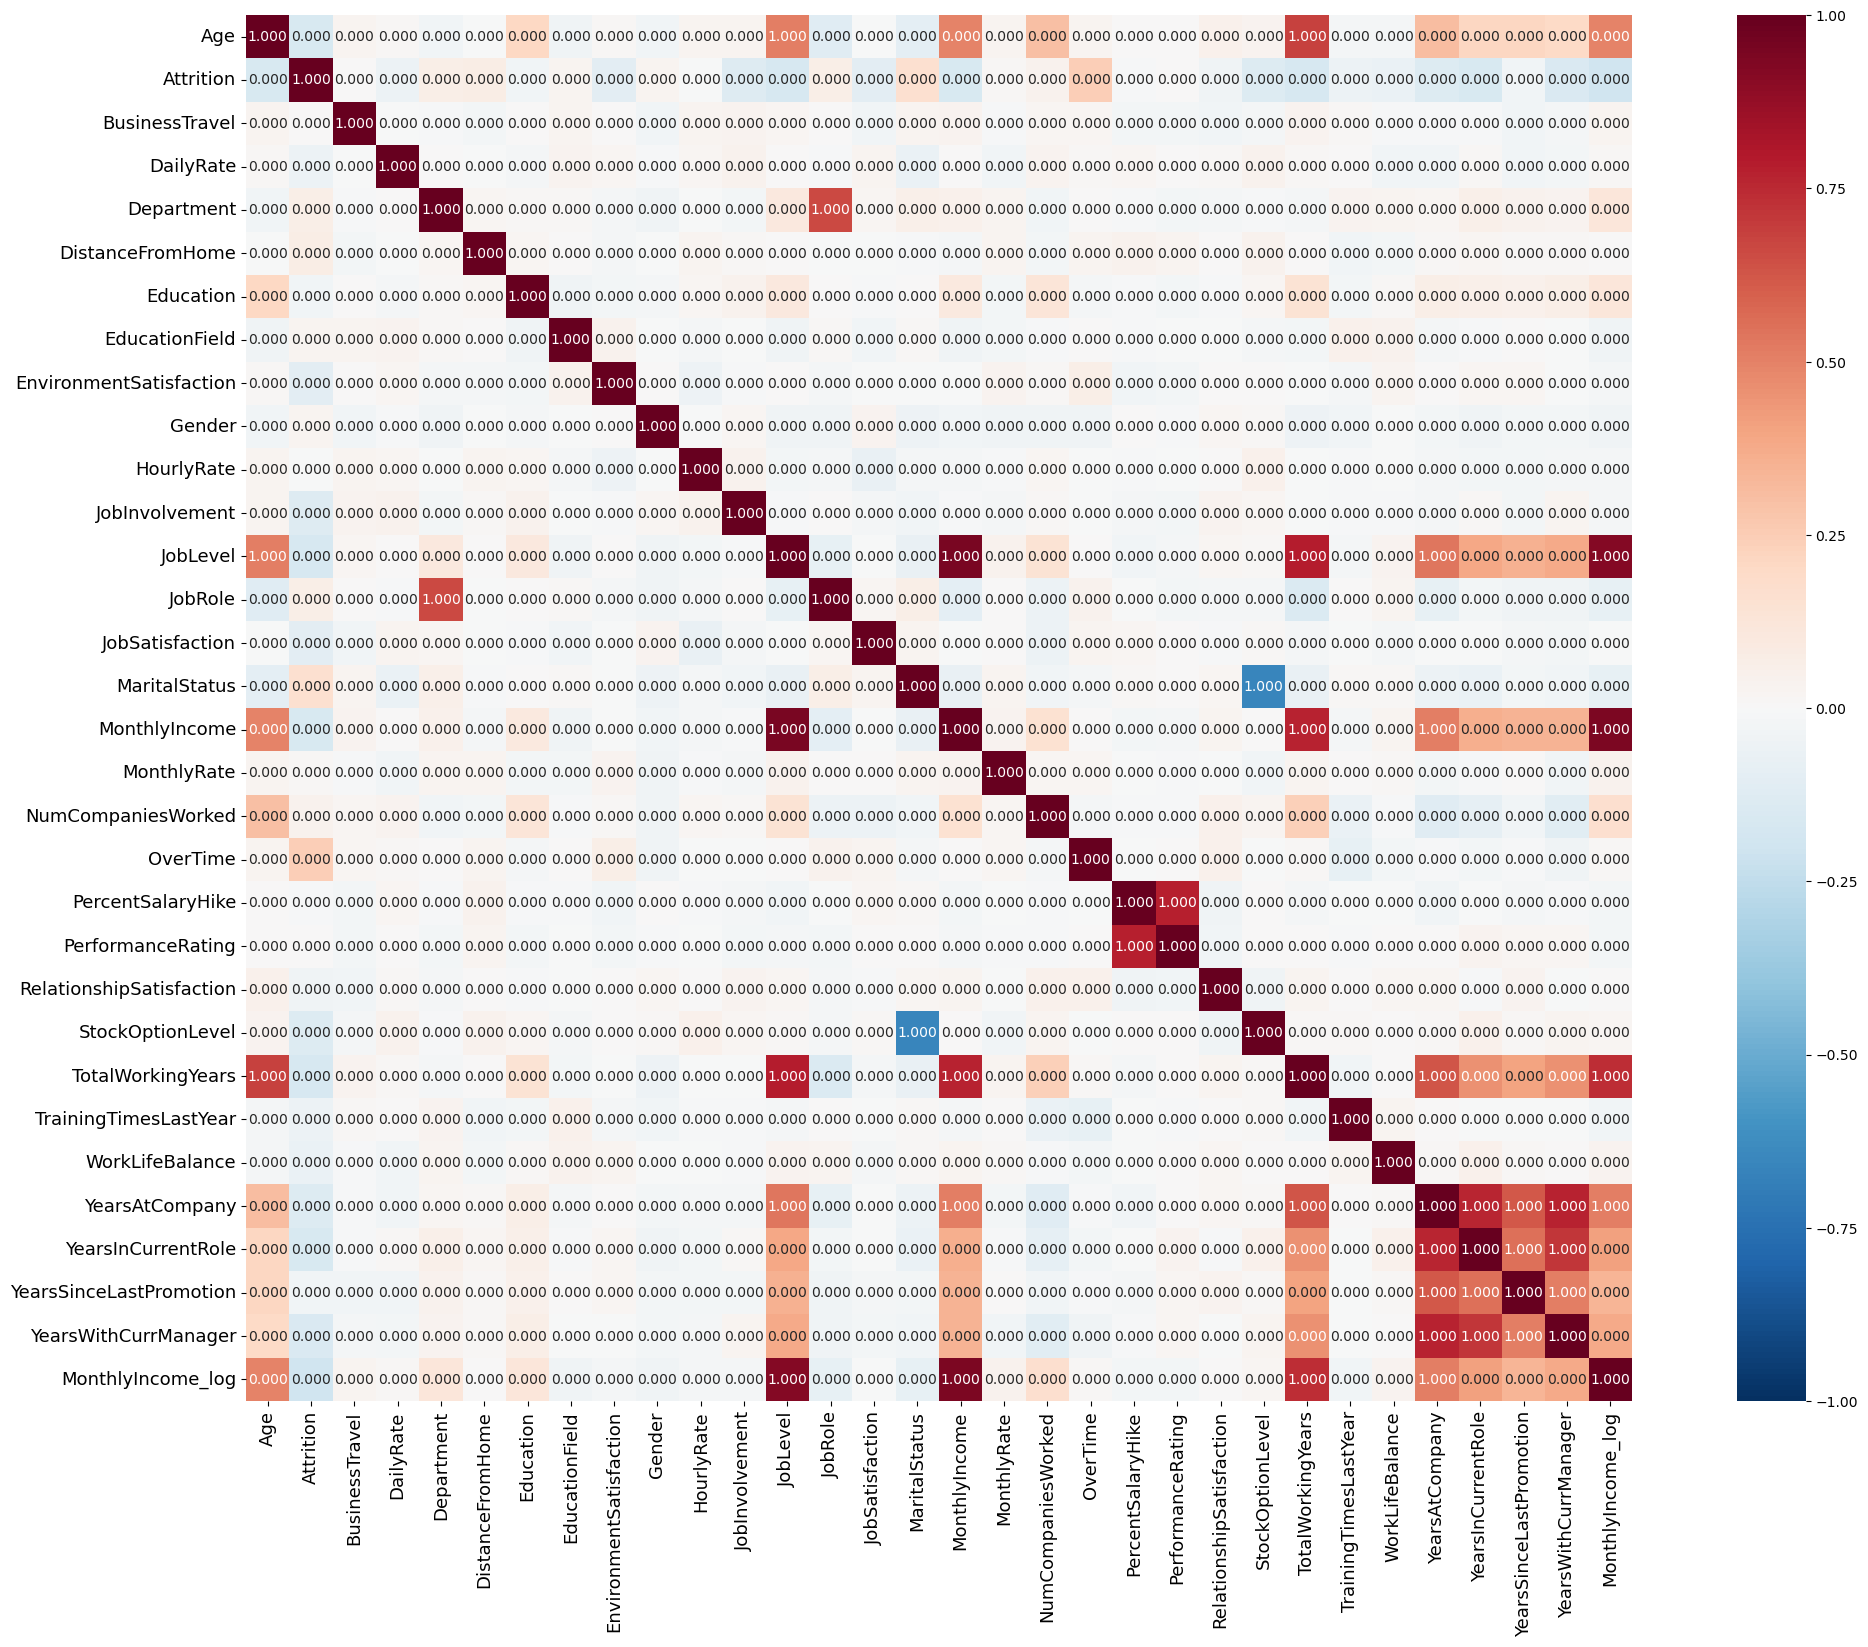

In [135]:
plt.figure(figsize=(27, 18))
corr_matrix = df.corr()
threshold = 0.5
a_mask = np.abs(corr_matrix) >= threshold
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=a_mask, square=True, fmt='.3f',annot_kws={'size': 10}, cmap='RdBu_r')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [ ]:
#Here we can see some evidence of multicollinearity (Job Level & Years at company, Total Working Years) - Performance rating with percenthike

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
VIF=pd.DataFrame()
VIF['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
VIF['Independent Features']= df1.columns
VIF

,VIF,Independent Features
0,1.945689,Age
1,1.561259,BusinessTravel
2,1.026160,DailyRate
3,1.836799,Department
4,1.050373,DistanceFromHome
5,1.098551,Education
6,1.060349,EducationField
7,1.033849,EnvironmentSatisfaction
8,1.068109,Gender
9,1.020549,HourlyRate


In [ ]:
#All are under 10 (does not exceed the threshold)

In [ ]:
#As we saw earlier, the target variable is imbalance, so we will use SMOTE to balance it

In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
fixsample = SMOTE()
A, B = fixsample.fit_resample(A, B)

In [141]:
B.value_counts()

Attrition
1.0    1158
0.0    1158
Name: count, dtype: int64

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
Scaled= StandardScaler()
A_scale = Scaled.fit_transform(A)

In [ ]:
#We can also use PCA Analysis to check how many components actually contribute towards the attrition

In [152]:
from sklearn.decomposition import PCA

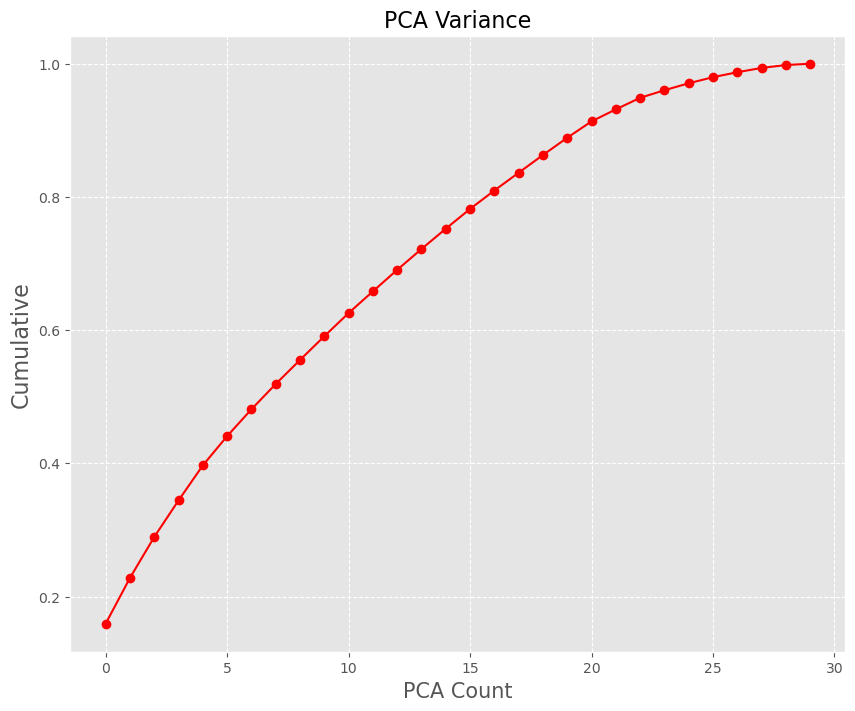

In [155]:
Pca = PCA()
PCA1 = Pca.fit_transform(A_scale)
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.xlabel('PCA Count', fontsize=15)
plt.ylabel('Cumulative', fontsize=16)
plt.title('PCA Variance', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()

In [ ]:
#We can see that 20 components contribute towards approximately 90% of variation

In [157]:
New_PCA1 = PCA(n_components=20)
A_new = New_PCA1.fit_transform(A_scale)

In [158]:
Final=pd.DataFrame(A_new,columns=np.arange(20))

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [162]:
A_train, A_test, B_train, B_test = train_test_split(Final, B, random_state=40, test_size=.25)

In [163]:
A_train.shape

(1737, 20)

In [165]:
A_test.shape

(579, 20)

In [166]:
B_train.shape

(1737,)

In [167]:
B_test.shape

(579,)

In [177]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    modelRF = RandomForestClassifier()
    modelRF.fit(A_train, B_train)
    predictor=modelRF.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.9115426105717368 at randomstate: 72


In [178]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    LG = LogisticRegression()
    LG.fit(A_train, B_train)
    predictor=LG.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8619201725997843 at randomstate: 53


In [179]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    modelDT = DecisionTreeClassifier()
    modelDT.fit(A_train, B_train)
    predictor=modelDT.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8187702265372169 at randomstate: 46


In [180]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    GB = GradientBoostingClassifier()
    GB.fit(A_train, B_train)
    predictor=GB.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8824163969795038 at randomstate: 72


In [182]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    BC = BaggingClassifier()
    BC.fit(A_train, B_train)
    predictor=BC.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8640776699029126 at randomstate: 73


In [183]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train, A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    KNN = KNeighborsClassifier()
    KNN.fit(A_train, B_train)
    predictor=KNN.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8576051779935275 at randomstate: 44


In [184]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    ADA = AdaBoostClassifier()
    ADA.fit(A_train, B_train)
    predictor=ADA.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8554476806903991 at randomstate: 7


In [191]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [192]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    Svc = SVC()
    Svc.fit(A_train, B_train)
    predictor=Svc.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.9158576051779935 at randomstate: 7


In [193]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    A_train,A_test,B_train,B_test = train_test_split(Final, B, test_size = 0.40, random_state=r)
    NB = GaussianNB()
    NB.fit(A_train, B_train)
    predictor=NB.predict(A_test)
    initialscore = accuracy_score(B_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8511326860841424 at randomstate: 48


In [194]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [196]:
models = {
    'LG': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'ABC': AdaBoostClassifier(),
    'DT': DecisionTreeClassifier(),
    'BC': BaggingClassifier(),
    'Svc': SVC(),
    'NB': GaussianNB()}


def test_models(models, A_train, A_test, B_train, B_test):
    for title, m in models.items():
        m.fit(A_train, B_train)
        predresults = m.predict(A_test)
        acc = accuracy_score(B_test, predresults)
        c_matrix = confusion_matrix(B_test, predresults)
        classification_r = classification_report(B_test, predresults)
        print(f"output for {title}:")
        print(f"Overall Accuracy: {acc}")
        print("Confusion Matrix:")
        print(c_matrix)
        print("Classification Report:")
        print(classification_r)
        print("\n")

test_models(models, A_train, A_test, B_train, B_test)

output for LG:
Overall Accuracy: 0.819848975188781
Confusion Matrix:
[[372  84]
 [ 83 388]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       456
         1.0       0.82      0.82      0.82       471

    accuracy                           0.82       927
   macro avg       0.82      0.82      0.82       927
weighted avg       0.82      0.82      0.82       927



output for RF:
Overall Accuracy: 0.8694714131607335
Confusion Matrix:
[[401  55]
 [ 66 405]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       456
         1.0       0.88      0.86      0.87       471

    accuracy                           0.87       927
   macro avg       0.87      0.87      0.87       927
weighted avg       0.87      0.87      0.87       927



output for GB:
Overall Accuracy: 0.8446601941747572
Confusion Matrix:
[[380  76]
 [ 68 403]]
Classification Rep

In [200]:
list_of_classifiers = {
    'LG': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'ABC': AdaBoostClassifier(),
    'DT': DecisionTreeClassifier(),
    'BC': BaggingClassifier(),
    'Svc': SVC(),
    'NB': GaussianNB()}

Output = {}

for name, c in list_of_classifiers.items():
    cvs = cross_val_score(c, A, B, cv=5)
    c.fit(A_train, B_train)
    predict_test = c.predict(A_test)
    accuracy_testing = accuracy_score(B_test, predict_test)
    mcv_testcv_difference = accuracy_testing - cvs.mean()
    Output[name] = {
        'Cross Validation Scores': cvs,
        'Mean of Cross Validation Scores': cvs.mean(),
        'Accuracy of the test': accuracy_testing,
        'Overall difference': mcv_testcv_difference}

for name, m in Output.items():
    print(f"{name}:")
    print(f"Cross-Validation Scores: {m['Cross Validation Scores']}")
    print(f"Mean Cross-Validation: {m['Mean of Cross Validation Scores']}")
    print(f"Accuracy: {m['Accuracy of the test']}")

LG:
Cross-Validation Scores: [0.62068966 0.68682505 0.6825054  0.66954644 0.67818575]
Mean Cross-Validation: 0.6675504580323229
Accuracy: 0.819848975188781
RF:
Cross-Validation Scores: [0.70689655 0.98056156 0.96760259 0.95464363 0.97840173]
Mean Cross-Validation: 0.9176212109927757
Accuracy: 0.8727076591154261
GB:
Cross-Validation Scores: [0.59051724 0.97408207 0.96112311 0.93952484 0.97192225]
Mean Cross-Validation: 0.8874339018395769
Accuracy: 0.8446601941747572
ABC:
Cross-Validation Scores: [0.60775862 0.93520518 0.92440605 0.92008639 0.94600432]
Mean Cross-Validation: 0.8666921129068296
Accuracy: 0.8241639697950378
DT:
Cross-Validation Scores: [0.6875     0.90712743 0.88336933 0.8812095  0.91576674]
Mean Cross-Validation: 0.8549946004319654
Accuracy: 0.7950377562028047
BC:
Cross-Validation Scores: [0.66594828 0.97192225 0.94600432 0.93088553 0.97192225]
Mean Cross-Validation: 0.8973365234229538
Accuracy: 0.8435814455231931
Svc:
Cross-Validation Scores: [0.58189655 0.62850972 0.609

In [ ]:
#Here looking at all the results, Random Forest is providing us with the best score! We will go ahead with Random Forest

In [201]:
from sklearn.model_selection import GridSearchCV

In [204]:
param_rf = {'n_estimators': [100, 200, 300],'max_depth': [2, 6, 15],'criterion': ['gini', 'entropy'],'min_samples_leaf': [1, 2, 4],'max_features': ['sqrt', 'log2'],'bootstrap': [True, False],'min_samples_split': [2, 5, 10]}

In [205]:
GVC.best_params_

In [207]:
GVC.fit(A_train,B_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [208]:
GVC.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [210]:
True_model=RandomForestClassifier(bootstrap= False, criterion = 'entropy',max_depth=15, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 5,n_estimators = 200)
True_model.fit(A_train,B_train)
pred=True_model.predict(A_test)
acc= accuracy_score(B_test,pred)
print(acc*100)

87.59439050701187


In [211]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

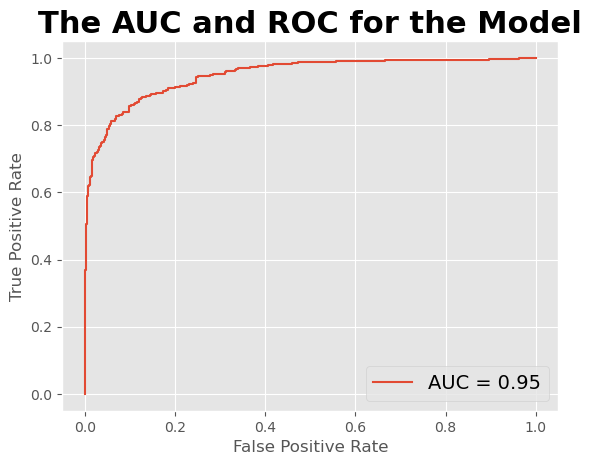

In [212]:
score = True_model.predict_proba(A_test)[:, 1]
fpr, tpr, _ = roc_curve(B_test, score)
roc_auc = roc_auc_score(B_test, score)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.legend(prop={'size': 14})
plt.title('The AUC and ROC for the Model', fontsize=22, fontweight='bold')
plt.show()

In [213]:
import joblib
joblib.dump(True_model, 'HR_Analytics')

['HR_Analytics']